In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation

#import plotly. as py
#import plotly.graph_objs as go
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2)

In [2]:
expt_name = 'Obsidian4'; shorthand = 'Obs4'; subfolder = 'pyplots/'

In [20]:
# linux use this
data = tuple(csv.reader(open(expt_name+'_scaffold_cart.csv')))

# mac use this
#csvfile = open('ObsidianAssemblyStats.csv', 'Ur')#, newline='')
#data = list(csv.reader(csvfile, delimiter = ','))
contigorigin = list(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/127877.assembled.names_map'))
contigorigin2 = list(csv.reader(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/127877.assembled.names_map')))
crisprs = list(csv.reader(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/127877.assembled.crisprs.csv')))
alignment_report = pd.read_table(expt_name+'/super_contigs.'+expt_name+'.alignment_report.txt')
demux = pd.read_csv(expt_name+'_demux.csv')
demux['Sample Name'], demux['Well_num'] = demux['Sample Name'].str.split('ll').str
tsne_k4 = list(open(expt_name+'_tSNE_k4.txt'))
tsne_k5 = list(open(expt_name+'_tSNE_k5.txt'))

def fromasciitodf(inputarg):
    dat = []
    for i in inputarg:
        dt = i.split()
        daaat = [float(dt[0]),float(dt[1])]
        dat.append(daaat)
    tsne = pd.DataFrame.from_records(dat,columns=['x','y'])
    return(tsne)

tSNE_k4 = fromasciitodf(tsne_k4)
tSNE_k5 = fromasciitodf(tsne_k5)

In [7]:
# get the Fragment analysis [DNA] and turn into 8*12 df
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12];rows = ['A','B','C','D','E','F','G','H']
chip_conc = pd.DataFrame(columns=cols)
chip_conc.iloc[:,0] = rows;j=0;names = list(demux['Well_num'])
for i in range(0,len(names)):
    if 'A' in names[i]:
        #print('yes')
        chip_conc.iloc[0,int(names[i][1:3])] = demux.iloc[i,4]                  
    elif 'B' in names[i]:
        #print('maybe')  
        chip_conc.iloc[1,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'C' in names[i]:
        chip_conc.iloc[2,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'D' in names[i]:
        chip_conc.iloc[3,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'E' in names[i]:
        chip_conc.iloc[4,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'F' in names[i]:
        chip_conc.iloc[5,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'G' in names[i]:
        chip_conc.iloc[6,int(names[i][1:3])] = demux.iloc[i,4]
    elif 'H' in names[i]:
        chip_conc.iloc[7,int(names[i][1:3])] = demux.iloc[i,4]


TypeError: argument of type 'float' is not iterable

In [22]:
# this processes the scaffold cart list before turning it into a dataframe. (this is more for historical reasons than out of necessity)
dataset = [data[0][0:16]]
for i in range(1,len(data)):
    #dataset.append([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4]+data[i][5]+data[i][6]+data[i][7]+data[i][8],data[i][9],data[i][10],data[i][11],data[i][12],data[i][13],data[i][14],data[i][15],data[i][16],data[i][17],data[i][18],data[i][19],data[i][20]])
    dataset.append(data[i][0:16])
    if dataset[i][8]=='':
        for j in range(8,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][9]=='':
        for j in range(9,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][10]=='':
        for j in range(10,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][11]=='':
        for j in range(11,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][12]=='':
        for j in range(12,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][13]=='':
        for j in range(13,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][14]=='':
        dataset[i][14]='Unassigned'
        
    if dataset[i][15]=='':
        dataset[i][15]='0'
      
        
df = pd.DataFrame.from_records(dataset[1:],columns=dataset[0])
#df_ = pd.DataFrame({'A' : []})
#df.append(df_)
#convert specific columns to integers (or floats, ...)

df['Scaffold Name'] = df['Scaffold Name'].astype(np.int)
df['Gene Count'] = df['Gene Count'].astype(np.int)
df['Sequence Length'] = df['Sequence Length'].astype(np.int)
df['GC Content'] = df['GC Content'].astype(np.float)
df = df.sort_values('Scaffold Name') # sort according to annotation number 
df = df.reset_index(drop=True) # reset the row numbers 
#df['Lineage Percentage'] = df['Lineage Percentage'].astype(np.float) # this does not work, perhaps because of empty values
# make crispr file dataframe
df_crispr = pd.DataFrame.from_records(crisprs,columns=['assembly','contig','number','startseq','repeat','intermediate'])
df_crispr.contig =  df_crispr.contig.astype(np.int)
# get the contigs that contain CRISPRS
crisprContigs = df_crispr.contig.unique()

In [23]:
# append a column to the dataframe 
df['CRISPR'] = 'NO'
for i in range(0,len(crisprContigs)):
    x=df[df['Scaffold Name'] == crisprContigs[i]]
    df.iloc[x.index[0],16] = 'YES'
# append other columns to the main dataframe
df['well_counts'] = ''
df['k4_x'] = tSNE_k4['x'];df['k4_y'] = tSNE_k4['y'];df['k5_x'] = tSNE_k5['x'];df['k5_y'] = tSNE_k5['y']

# make contigorigin dataframe
df_contigorigin = pd.DataFrame.from_records(contigorigin2,columns=['contig_name'])
#df_contigorigin['Assembly'], df_contigorigin['scaffold_name'] = df_contigorigin['contig_name'].str.split('\t',1).str
df_contigorigin = df_contigorigin['contig_name'].str.split('\t', 1, expand=True)
df_contigorigin.columns = ['contig_name','scaffold_name']
# split column to get contig ID number
#df_contigorigin = df_contigorigin['scaffold_name'].str.split('_', 1, expand=True)
df_contigorigin['Assembly'], df_contigorigin['scaffold_num'] = df_contigorigin['scaffold_name'].str.split('_',1).str
#df_contigorigin.columns = ['contig_name','scaffold_name','scaffold_num']
df_contigorigin['scaffold_num'] = df_contigorigin['scaffold_num'].astype(np.int)

# append column and assign assembly type/origin
df_contigorigin['type'] = ''
for i in range(0,len(contigorigin)):
    if "flag" in contigorigin[i] and "Bulk" in contigorigin[i]:
        df_contigorigin.iloc[i,4] = 'megahit'
    elif "NODE" in contigorigin[i] and "Bulk" in contigorigin[i]:
        df_contigorigin.iloc[i,4] = 'metaSPAdes'
    else:
        df_contigorigin.iloc[i,4] = 'minimetagenomics'

df['Genome ID'] = df_contigorigin['type']

# find a way to replace the column names of 'alignment_report' with the corresponding ufluidic chamber number    
barcodes_used = list(alignment_report)
barcodes_made = list(demux.iloc[:,3])
barcodes_unused = pd.DataFrame(columns=['Unused_barcodes', 'corresp_well'])
AR_contigs = pd.DataFrame(columns=['ContigName'])
AR_contigs['ContigName']= alignment_report.iloc[:,0];j=0
for i in range(0,len(barcodes_made)):
    if barcodes_made[i] in alignment_report.columns:
        AR2 = alignment_report.filter(regex=barcodes_made[i])
        AR_contigs[demux.iloc[i,5]] = AR2
    else:
        barcodes_unused.loc[j] = [demux.iloc[i,3],demux.iloc[i,5]];j+=1
print(barcodes_unused)



# add well numbers to 'df'
wells = list(AR_contigs)
emptywellframe = pd.DataFrame(columns=wells)
df =  df.join([emptywellframe])


         Unused_barcodes corresp_well
0       IL1605-N718-S513          A02
1       IL1605-N720-S513          A04
2       IL1605-N726-S513          A09
3       IL1605-N729-S513          A12
4       IL1605-N724-S515          B08
5       IL1605-N727-S515          B10
6       IL1605-N729-S515          B12
7       IL1605-N722-S516          C06
8       IL1605-N723-S516          C07
9       IL1605-N726-S516          C09
10      IL1605-N720-S517          D04
11      IL1605-N726-S517          D09
12      IL1605-N721-S518          E05
13      IL1605-N722-S518          E06
14      IL1605-N724-S518          E08
15      IL1605-N726-S518          E09
16      IL1605-N721-S520          F05
17      IL1605-N726-S520          F09
18      IL1605-N723-S521          G07
19      IL1605-N722-S522          H06
20      IL1605-N729-S522          H12
21  Obsidian6Bulk-Nugen1          NaN
22  HwCrystalBulk-Nugen2          NaN
23  HwCrystalBulk-Nugen3          NaN


In [24]:
# now add alignment report wells to corresponding contigs
contigs_alignmentreport = list(AR_contigs.iloc[:,0])
for i in range(0,len(contigs_alignmentreport)):
    if df_contigorigin['contig_name'].str.contains(contigs_alignmentreport[i]).any():
        #boolframe = df_contigorigin['contig_name'].str.contains(contigs_alignmentreport[i]) #these two lines also work, instead of the two below
        #idx = boolframe[boolframe == True].index[0]
        idx = df_contigorigin.loc[df_contigorigin['contig_name'] == contigs_alignmentreport[i]]
        #x = df.loc[df['Scaffold Name'] == df_contigorigin.iloc[idx.index[0],3]] #this is the contig number that needs to be found in 'df' 
        df.iloc[idx.index[0],22] = AR_contigs.iloc[i,0]
        df.iloc[idx.index[0],23:] = AR_contigs.iloc[i,1:].astype(np.float)
        #print(df_contigorigin.index.get_loc(df_contigorigin['contig_name'] == contigs_alignmentreport[i]))
    else:
        print('contig not in file')

In [25]:
# set a threshold for the normalized alignment report value
# take that into a binary count 
threshold = 0.1
# count all wells above this threshold for each contig, add the contig counts to 'well_counts'
v = np.where(df.iloc[:,23:] > threshold ,1,0)
w = []
for j in range(0,len(v)):
    w.append(sum(v[j]))
df['well_counts'] = w

In [26]:
# turn the columns with the well coordinates into something plottable - heatmap style
# e.g. plotting the double selected dataframe 'b' above into a heatmap, 8x12

#make a 8x12 dataframe
def minimetaWells(dataframe,plot,norm):
    cols = [0,1,2,3,4,5,6,7,8,9,10,11,12];rows = ['A','B','C','D','E','F','G','H']
    chip = pd.DataFrame(columns=cols)
    chip[0] = rows;
    colnames = list(df);colnames = colnames[23:];k=0;
    selectedcontigs = dataframe.iloc[:,23:]
    if norm == 'YES':
        for i in range(23,len(colnames)+23):
            selectedcontigs.iloc[:,k] = dataframe.iloc[:,i]/np.sum(dataframe.iloc[:,23:],1) #apply threshold here
            k+=1
    for j in range(0,len(selectedcontigs)):
        subselection = selectedcontigs.iloc[j,:]
        for i in colnames:
            if j == 0:
                if 'A' in i:
                    chip.iloc[0,int(i[1:3])] = subselection[i]                    
                elif 'B' in i:
                    chip.iloc[1,int(i[1:3])] = subselection[i]
                elif 'C' in i:
                    chip.iloc[2,int(i[1:3])] = subselection[i]
                elif 'D' in i:
                    chip.iloc[3,int(i[1:3])] = subselection[i]
                elif 'E' in i:
                    chip.iloc[4,int(i[1:3])] = subselection[i]
                elif 'F' in i:
                    chip.iloc[5,int(i[1:3])] = subselection[i]
                elif 'G' in i:
                    chip.iloc[6,int(i[1:3])] = subselection[i]
                elif 'H' in i:
                    chip.iloc[7,int(i[1:3])] = subselection[i] 
            else: 
                if 'A' in i:
                    chip.iloc[0,int(i[1:3])] = chip.iloc[0,int(i[1:3])] + subselection[i]
                elif 'B' in i:
                    chip.iloc[1,int(i[1:3])] = chip.iloc[1,int(i[1:3])] + subselection[i]
                elif 'C' in i:
                    chip.iloc[2,int(i[1:3])] = chip.iloc[2,int(i[1:3])] + subselection[i]
                elif 'D' in i:
                    chip.iloc[3,int(i[1:3])] = chip.iloc[3,int(i[1:3])] + subselection[i]
                elif 'E' in i:
                    chip.iloc[4,int(i[1:3])] = chip.iloc[4,int(i[1:3])] + subselection[i]
                elif 'F' in i:
                    chip.iloc[5,int(i[1:3])] = chip.iloc[5,int(i[1:3])] + subselection[i]
                elif 'G' in i:
                    chip.iloc[6,int(i[1:3])] = chip.iloc[6,int(i[1:3])] + subselection[i]
                elif 'H' in i:
                    chip.iloc[7,int(i[1:3])] = chip.iloc[7,int(i[1:3])] + subselection[i]  
    if plot == 'ON':
        #plot the chip as a heat map
        c = chip.iloc[:,1:]
        c = c[c.columns].astype(float)
        #cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
        #sns.heatmap(c, cmap=cmap, mask=c.isnull())
        sns.heatmap(c,linewidths=.5,yticklabels=rows) #
        sns.set(font_scale = 2)
        plt.yticks(rotation=0)
        plt.show()
        
    
    return(chip)

In [27]:
# select the rows in the dataframe that fall within tSNE x,y values specified

def select_tSNEregion(dataframe,kmertype,x_lo,x_hi,y_lo,y_hi,plot):
    #kmertype has to be a string, 'k4' OR 'k5'
    if kmertype == 'k4':
        k_contigs = dataframe.loc[(dataframe['k4_x'] >= x_lo) & (dataframe['k4_x'] <= x_hi) & (dataframe['k4_y'] >= y_lo) & (dataframe['k4_y'] <= y_hi)]
    elif kmertype == 'k5':
        k_contigs1 = dataframe.loc[(dataframe['k5_x'] >= x_lo) & (dataframe['k5_x'] <= x_hi)] 
        k_contigs = k_contigs1.loc[(k_contigs1['k5_y'] >= y_lo) & (k_contigs1['k5_y'] <= y_hi)]
    
    if plot == 'ON':
        # plot tSNE, selected region shown, and inset 
        f, ax = plt.subplots()
        if kmertype == 'k4':
            plt.subplot(311)
            plt.scatter(dataframe['k4_x'],dataframe['k4_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)

            plt.subplot(312)
            plt.scatter(dataframe['k4_x'],dataframe['k4_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)
            plt.plot([x_lo,x_hi],[y_lo,y_lo],'-k')
            plt.plot([x_lo,x_hi],[y_hi,y_hi],'-k')
            plt.plot([x_lo,x_lo],[y_lo,y_hi],'-k')
            plt.plot([x_hi,x_hi],[y_lo,y_hi],'-k')

            plt.subplot(313)
            plt.scatter(k_contigs['k4_x'],k_contigs['k4_y'],s=k_contigs['Sequence Length']/1e2,alpha=0.2)
            plt.xlim(x_lo,x_hi)
            plt.ylim(y_lo,y_hi)
            
        elif kmertype == 'k5':
            plt.subplot(311)
            plt.scatter(dataframe['k5_x'],dataframe['k5_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)

            plt.subplot(312)
            plt.scatter(dataframe['k5_x'],dataframe['k5_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)
            plt.plot([x_lo,x_hi],[y_lo,y_lo],'-k')
            plt.plot([x_lo,x_hi],[y_hi,y_hi],'-k')
            plt.plot([x_lo,x_lo],[y_lo,y_hi],'-k')
            plt.plot([x_hi,x_hi],[y_lo,y_hi],'-k')

            plt.subplot(313)
            plt.scatter(k_contigs['k5_x'],k_contigs['k5_y'],s=k_contigs['Sequence Length']/1e1,alpha=0.2)
            plt.xlim(x_lo,x_hi)
            plt.ylim(y_lo,y_hi)
            
        f.set_figheight(24)
        f.set_figwidth(8)
        plt.show()
    
    return(k_contigs)

# select contigs that are not minimeta
def selectNotMinimeta(dataframe):
    bulk = dataframe[~dataframe['Genome ID'].str.contains('minimetagenomics')]
    return(bulk)

# select contigs that are  minimeta
def selectMinimeta(dataframe):
    mini = dataframe[dataframe['Genome ID'].str.contains('minimetagenomics')]
    return(mini)

In [28]:
def plotallphyla(df,lineage,unass):
    
    # this function starts with plotting the chip and tSNE of the entire experiment
    # then shows which is minimeta in the same configuration 
    # then cycles through all detected phyla, plotting them on the tSNE and their well presence 
    # then outputs an array containing the summed counts of df['Well counts'] per phylum 
    
    # lineage" must be a string naming one of the columns starting with "Lineage", e.g. 'Lineage Phylum' 
    
    minimeta = selectMinimeta(df)
    if unass == 'include':
        assigned_mini = minimeta
    else:
        assigned_mini = minimeta[~minimeta[lineage].str.contains('Unassigned')]
    listassigned = assigned_mini[lineage].unique()
    numspec = len(listassigned)
    counts = [];chipcount = [];gene_tot = [];contig_tot = [];length_tot = []
    countdf = pd.DataFrame(columns=[lineage[8:],'counts','chip','fractional occup.','mean_occup.','number of cells','num_contigs','length','genes'])
    countdf[lineage[8:]] = listassigned
    f,ax = plt.subplots()
    
    for i in listassigned:
        print(i)
        f,ax = plt.subplots()
        tempdf = assigned_mini[assigned_mini[lineage].str.contains(i)]
        counts.append(sum(tempdf['well_counts']))
        chip = minimetaWells(tempdf,'no','no')
        c = chip.iloc[:,1:]
        c = c[c.columns].astype(float)

        plt.subplot(221)
        sns.heatmap(c,linewidths=.5,yticklabels=rows) #
        sns.set(font_scale = 2)
        plt.yticks(rotation=0)
        #plt.show()
        
        #plt.
        # get logical heatmap
        a = np.max(c)
        a = np.max(a)
        plt.title(i)
        
        selectedclusters = minimeta[minimeta[lineage].str.contains(i)]
        invselectclust = minimeta[~minimeta[lineage].str.contains(i)]
        contigs = len(tempdf)
        contig_tot.append(contigs)
        lengthtot = np.sum(tempdf['Sequence Length']);
        length_tot.append(lengthtot)
        genetot = np.sum(tempdf['Gene Count'])
        gene_tot.append(genetot)
        
        info = [contigs,lengthtot,genetot]
        
        plt.subplot(222)
        plt.scatter(invselectclust['k5_x'],invselectclust['k5_y'],s=invselectclust['Sequence Length']/5e2, alpha=0.1)
        plt.scatter(selectedclusters['k5_x'],selectedclusters['k5_y'],s=selectedclusters['Sequence Length']/5e2, alpha=0.8)
        plt.xlim(-120,120)
        plt.ylim(-100,100)
        
        plt.text(-100,-200,'Number of contigs:      '+str(contigs)+'\n'+'Total sequence length:  '+str(lengthtot)+'\n'+'Number of genes:      '+str(genetot))
        
        plt.subplot(223)
        d = np.where(c > 0.3*a, 1,0)
        sns.heatmap(d,yticklabels=rows,linewidths=.5)
        plt.yticks(rotation=0)
        
        
        """  plt.subplot(224)
        ax.xaxis.set_visible(False) 
        ax.yaxis.set_visible(False)
        collabel=("col 1", "col 2", "col 3")
        ax.axis('tight')
        ax.axis('off')
        the_table = ax3.table(cellText=[info],colLabels=['Contigs','Length (bp)','Genes'],loc='center')
        
        dcsummary = pd.DataFrame([info],columns=['Contigs','Length (bp)','Genes'])
        f.table(cellText=dcsummary.values,colWidths = [0.25]*len(dcsummary.columns),
          rowLabels=dcsummary.index,
          colLabels=dcsummary.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='center')"""
        
        
        chipcount.append(sum(sum(d)))

        f.set_figwidth(18)
        f.set_figheight(14)
        plt.show()
        
        f.savefig(subfolder+expt_name+'_'+'minimetawells_'+lineage[8:]+':'+i+'_lowthres.png')
        plt.clf()
        f.clf()
    
    countdf['num_contigs'] = contig_tot
    countdf['length'] = length_tot
    countdf['genes'] = gene_tot
    countdf['counts'] = counts
    countdf['chip'] = chipcount
    countdf['fractional occup.'] = np.asarray(chipcount)/len(df.iloc[0,23:])
    countdf['mean_occup.'] = -np.log(1-countdf['fractional occup.'])
    countdf['number of cells'] = countdf['chip']+countdf['chip']*countdf['mean_occup.']
    
    return(countdf)
    

In [29]:
                #####################################
                ### now start plotting everything ###
                #####################################

In [30]:
mini = selectMinimeta(df) # dataframe with only minimeta contigs
chip = minimetaWells(mini,'off',"no") # assembly report projected on chip
chip2 = minimetaWells(mini,'off',"YES") # normalized AR ~

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


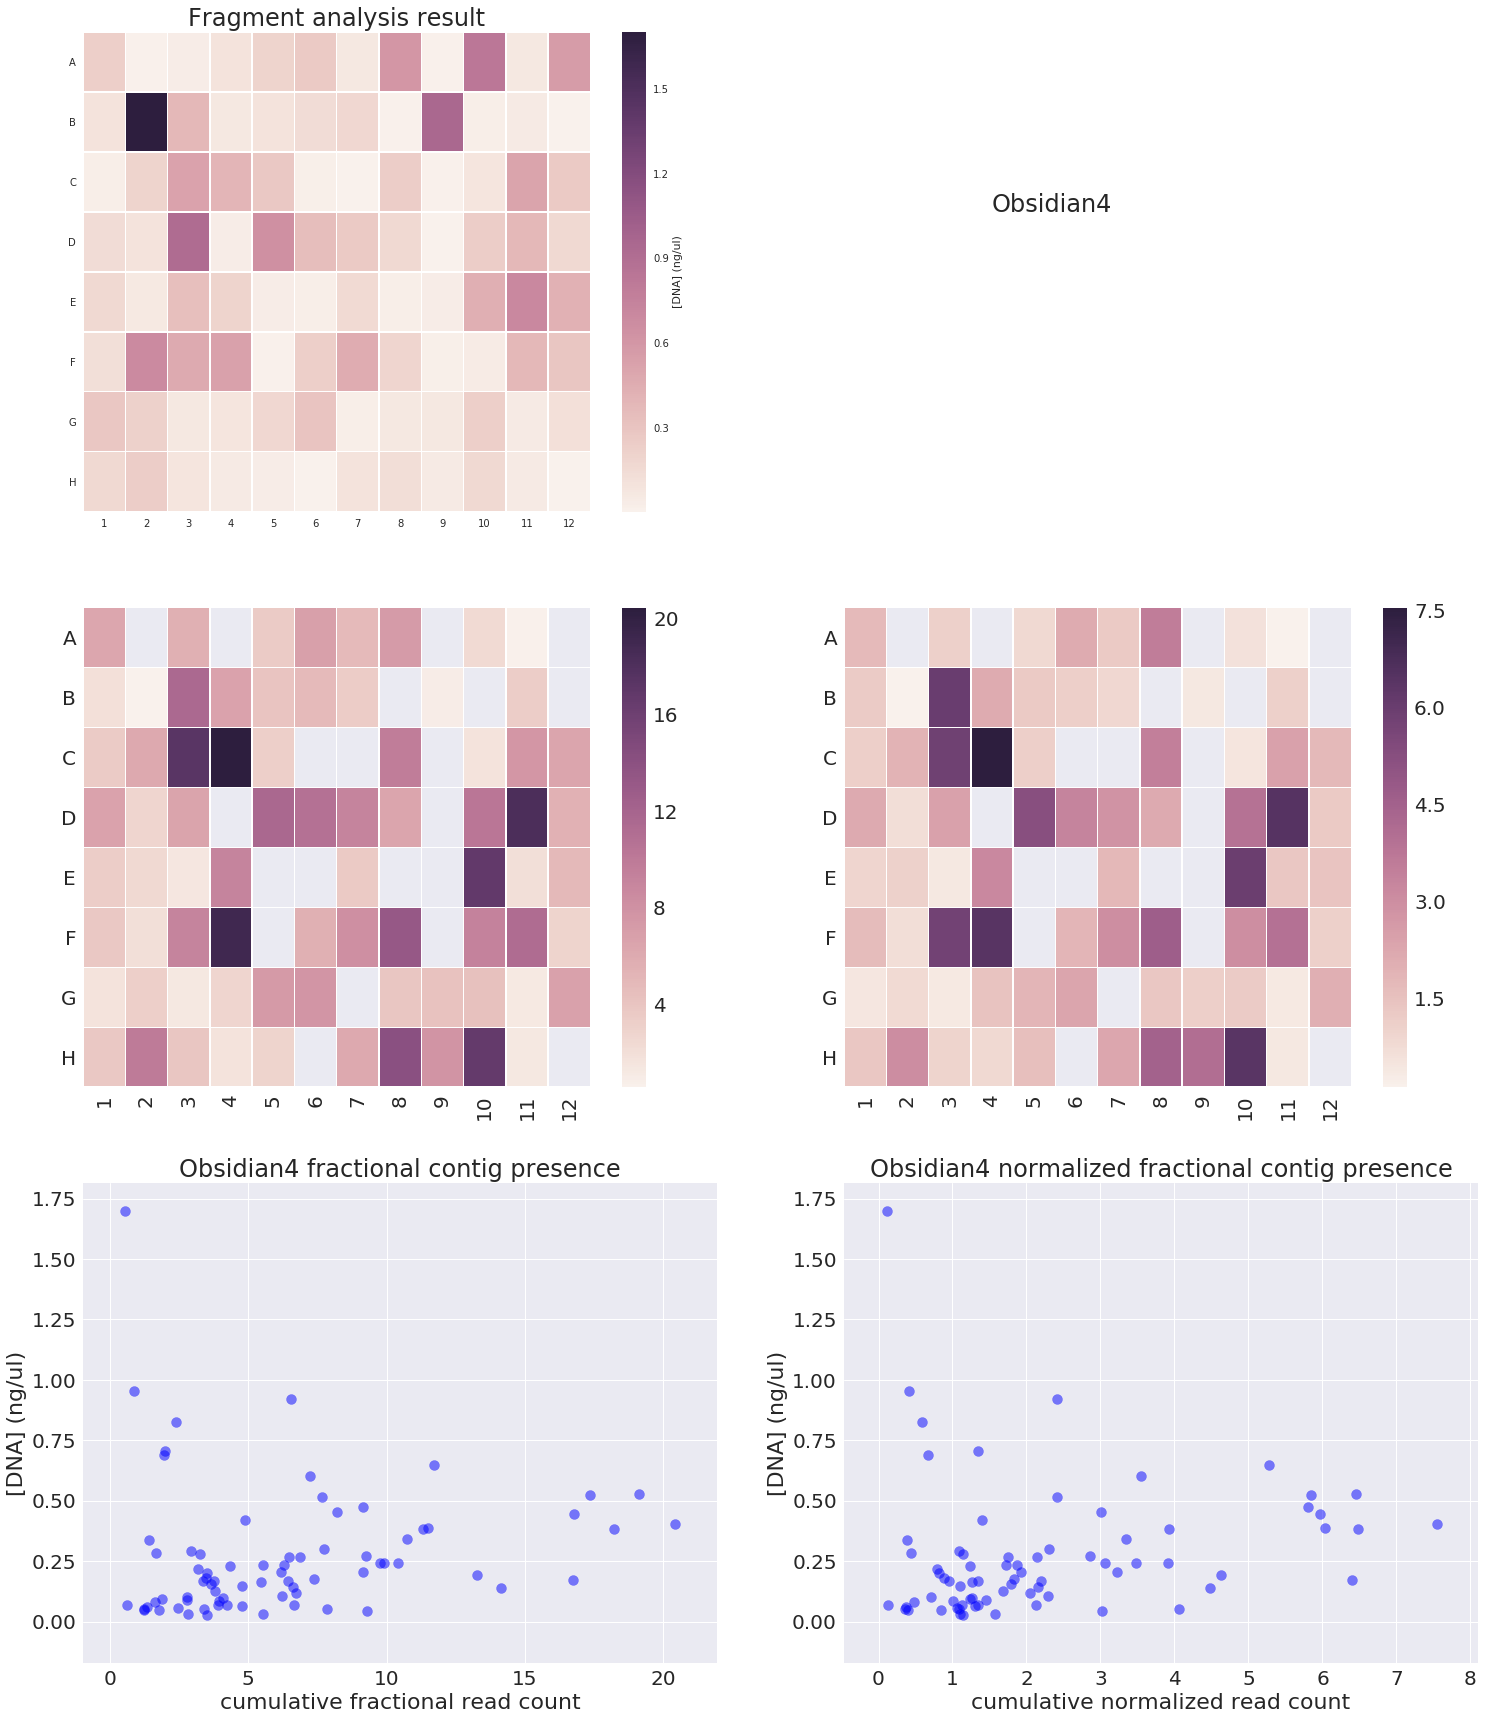

In [31]:
# [DNA] vs. contig presence (assembly report)
#plot the chip as a heat map
f,ax = plt.subplots()

plt.subplot(321)
c = chip_conc.iloc[:,1:]
c = c[c.columns].astype(float)
sns.heatmap(c,linewidths=.5,yticklabels=rows,cbar_kws={'label': '[DNA] (ng/ul)'}) #
sns.set(font_scale = 2)
plt.yticks(rotation=0)
plt.title('Fragment analysis result')
plt.text(21.5,5,expt_name)

#plt.subplot(322)


plt.subplot(323)
c = chip.iloc[:,1:]
c = c[c.columns].astype(float)
#cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
#sns.heatmap(c, cmap=cmap, mask=c.isnull())
sns.heatmap(c,linewidths=.5,yticklabels=rows) #
sns.set(font_scale = 2)
plt.yticks(rotation=0)

plt.subplot(324)
c = chip2.iloc[:,1:]
c = c[c.columns].astype(float)
#cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
#sns.heatmap(c, cmap=cmap, mask=c.isnull())
sns.heatmap(c,linewidths=.5,yticklabels=rows) #
sns.set(font_scale = 2)
plt.yticks(rotation=0)


plt.subplot(325)
for i in range(1,13):
    plt.scatter(chip[i],chip_conc[i],s=100,c='blue',alpha=0.5)

plt.title(expt_name+' fractional contig presence')
plt.xlabel('cumulative fractional read count')
plt.ylabel('[DNA] (ng/ul)')

plt.subplot(326)
for i in range(1,13):
    plt.scatter(chip2[i],chip_conc[i],s=100,c='blue',alpha=0.5)
plt.title(expt_name+' normalized fractional contig presence')
plt.xlabel('cumulative normalized read count')
plt.ylabel('[DNA] (ng/ul)')    

f.set_figheight(30)
f.set_figwidth(25)
plt.show()

f.savefig(subfolder+expt_name+'_AssemblyInfo.png')

In [62]:
def makeColorScheme(data,bar):
    domlist = ['Bacteria','Archaea','Unassigned','Viruses','Eukaryota']
    barcolortype=sns.color_palette("deep", 10)
    barcolor = []
    if bar == 'YES':
        a = data['Lineage Domain'].value_counts(ascending=True)
    else:
        a = data['Lineage Domain'].value_counts()
    for i in range(0, len(a)):
        for j in range(0,len(domlist)):
            if a.index[i] == domlist[j]:
                barcolor.append(barcolortype[j])
    return(barcolor)

In [81]:
# this gets/sums the contig lengths per domain in a given dataframe, sorted and with names and color code for plotting 
def getLengthList(data):
    outputlist = [];names = [];
    namelist = ['Bacteria','Archaea','Unassigned','Viruses','Eukaryota']
    outputlist.append(data.loc[data['Lineage Domain'] == 'Bacteria', 'Sequence Length'].sum())
    if outputlist[0] != 0:
        names.append(namelist[0])
    outputlist.append(data.loc[data['Lineage Domain'] == 'Archaea', 'Sequence Length'].sum())
    if outputlist[1] != 0:
        names.append(namelist[1])
    outputlist.append(data.loc[data['Lineage Domain'] == 'Unassigned', 'Sequence Length'].sum())
    if outputlist[2] != 0:
        names.append(namelist[2])    
    outputlist.append(data.loc[data['Lineage Domain'] == 'Viruses', 'Sequence Length'].sum())
    if outputlist[3] != 0:
        names.append(namelist[3])
    outputlist.append(data.loc[data['Lineage Domain'] == 'Eukaryota', 'Sequence Length'].sum())
    if outputlist[4] != 0:
        names.append(namelist[4])
    output = np.array(outputlist)
    outputidx = np.where(output!=0)[0]
    output = output[outputidx]
    if outputlist[0]==0:
        barcolortype=sns.color_palette("deep", len(output)+1)
        barcolortype = barcolortype[1:]
    else:
        barcolortype=sns.color_palette("deep", len(output))
    idx = output.argsort()
    output.sort()
    names = list(np.array(names)[idx])
    barcolor = list(np.array(barcolortype)[idx])
    return(output,names,barcolor)

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


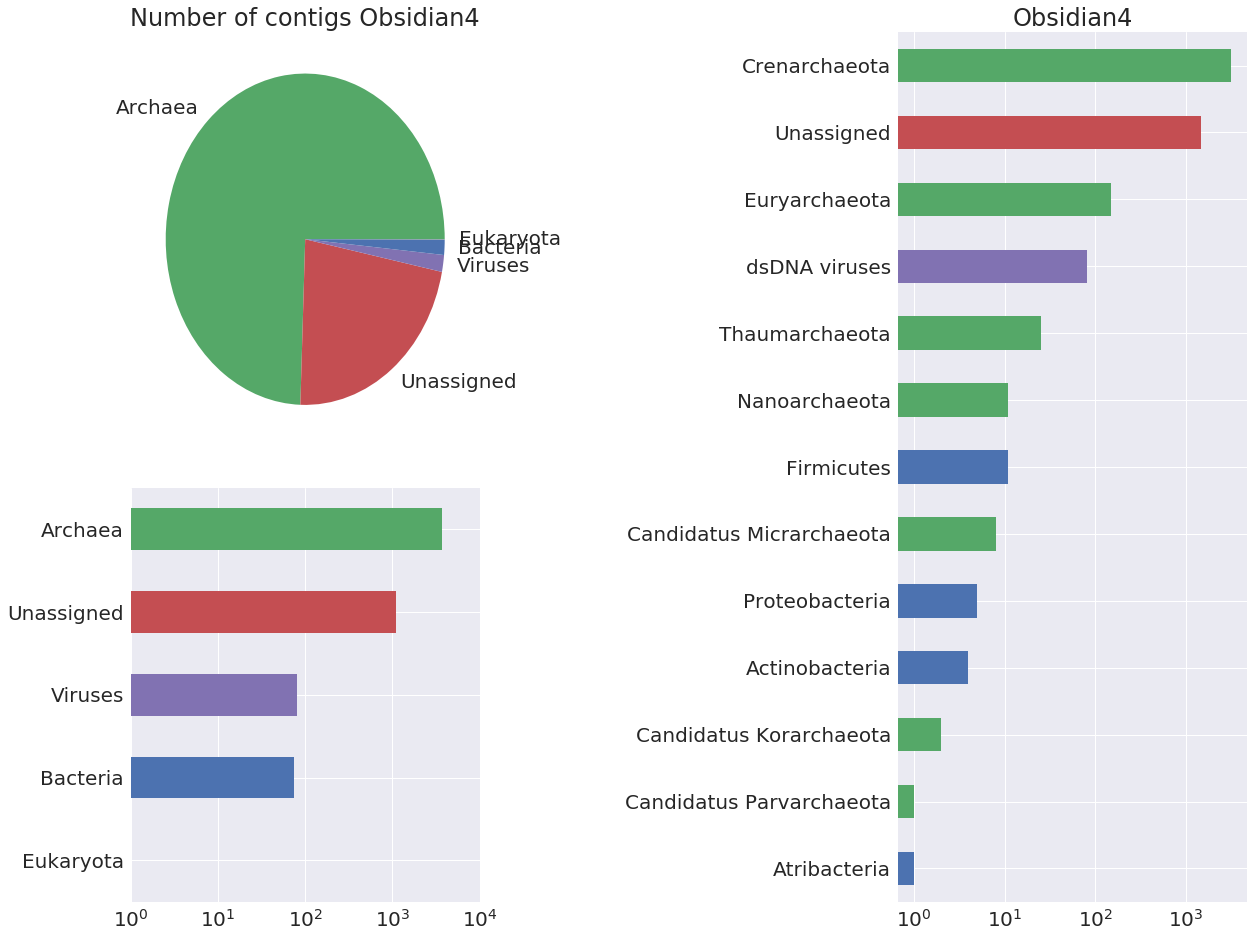

In [64]:
# the overall distribution of domains, a barh of phyla (CONTIG COUNT)
from collections import Counter

a = df['Lineage Phylum']
letter_counts = Counter(a)
phyl = pd.DataFrame.from_dict(letter_counts, orient='index')
phyl = phyl.sort_values(by=0,ascending=1)
phyl['dom']= '';k=0
for i in list(phyl.index):
    idx = df.loc[df['Lineage Phylum'] == i]
    phyl.iloc[k,1] = df.iloc[idx.index[0],8]
    k+=1
#phyl.iloc[len(phyl)-1,1] = 'Unassigned'


fig = plt.figure()

gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
barcolorspie = makeColorScheme(df,'No')
df['Lineage Domain'].value_counts().plot(kind='pie',legend=False,colors=barcolorspie)
plt.title('Number of contigs '+expt_name)
ax1.set_ylabel('')


ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(df,'YES')
df['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',logx=True,color=barcolorsdom)
ax2.set_xlim(1,1e4)

ax3 = fig.add_subplot(gs[:, 1])
barcolors = []
for i in range(0, len(phyl)):
    for j in range(0,len(domlist)):
        if phyl.iloc[i,1] == domlist[j]:
            barcolors.append(barcolortype[j])

phyl.plot(kind='barh',legend=False,logx=True,color=[barcolors],ax=ax3)

gs.update(wspace=1.20, hspace=0.1)

fig = plt.gcf()

#plotly_fig = tls.mpl_to_plotly( fig )
#plotly_fig['layout']['title'] = 'Subplots with variable widths and heights'

plt.title(expt_name)
fig.set_figheight(16)
fig.set_figwidth(20)
plt.show()

fig.savefig(subfolder+expt_name+'_overviewDomainPhylum.png')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


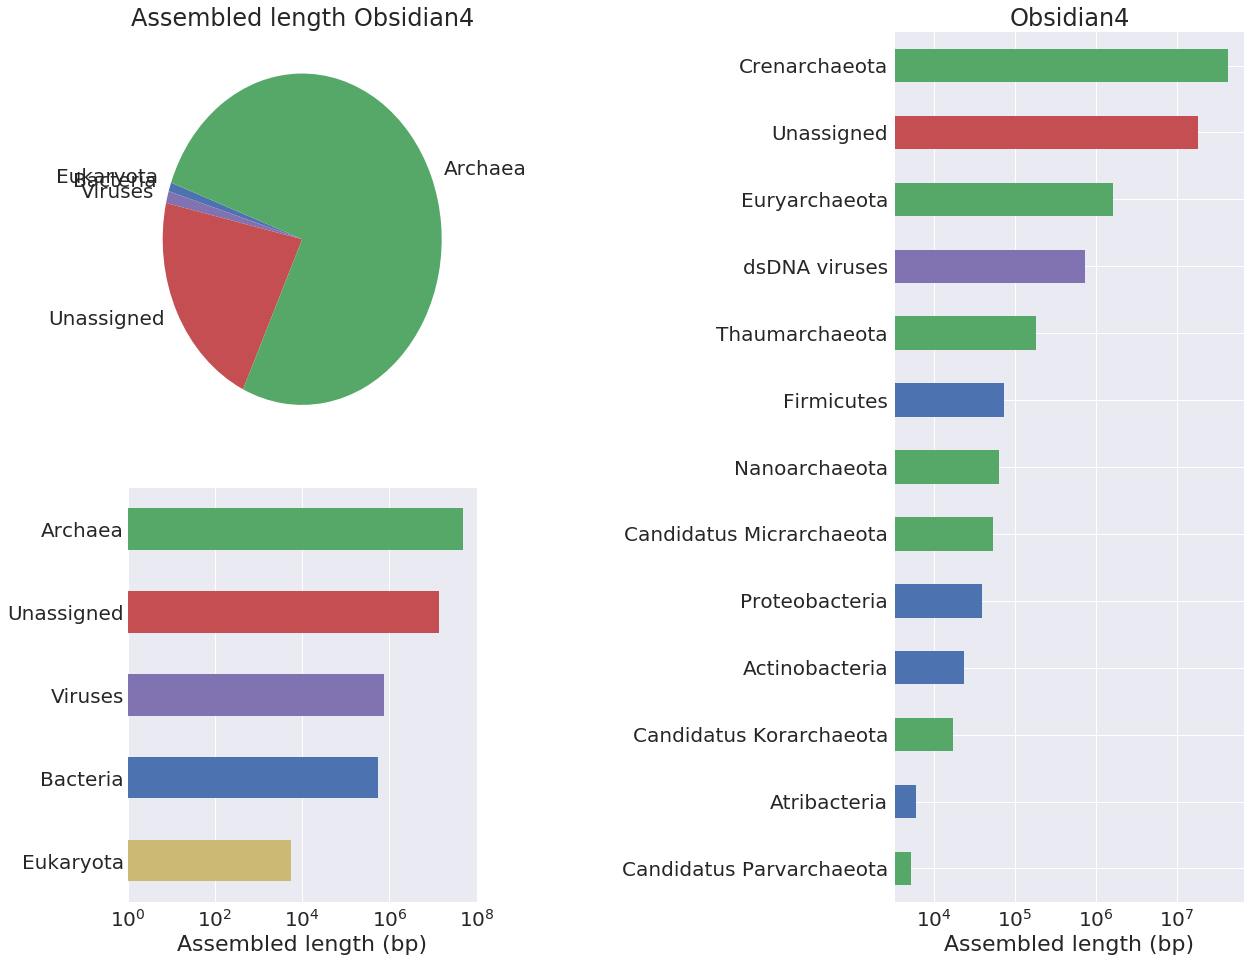

In [67]:
# the overall distribution of domains, a barh of phyla (ASSEMBLED LENGTH COUNT)
a = df['Lineage Phylum']
letter_counts = Counter(a)
phyl = pd.DataFrame.from_dict(letter_counts, orient='index')
#phyl = phyl.sort_values(by=0,ascending=1)
phyl['dom']= '';k=0
for i in list(phyl.index):
    idx = df.loc[df['Lineage Phylum'] == i]
    phyl.iloc[k,1] = df.iloc[idx.index[0],8]
    phyl.iloc[k,0] = df.loc[df['Lineage Phylum'] == i, 'Sequence Length'].sum()
    k+=1
phyl = phyl.sort_values(by=0,ascending=1)
#phyl.iloc[len(phyl)-1,1] = 'Unassigned'


fig = plt.figure()

gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
#barcolorspie = makeColorScheme(df,'No')
#df['Lineage Domain'].value_counts().plot(kind='pie',legend=False,colors=barcolorspie)
dflengths,labels,barcolor = getLengthList(df)
plt.pie(dflengths,startangle=160,labels=labels,colors=barcolor)
plt.title('Assembled length '+expt_name)
#plt.ylabel('')
#ax1.set_ylabel('')


ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(df,'YES')
a= df.groupby('Lineage Domain')['Sequence Length'].sum().reset_index()
a = a.sort_values('Sequence Length').reset_index()
ax = a.iloc[:,2].plot(kind='barh',legend=False,logx=True,color=barcolorsdom,figsize=(21,14))
for i, x in enumerate(a['Lineage Domain']):
    ax.text(0.81,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
plt.xlabel('Assembled length (bp)')
#b= [max(a['Sequence Length'])*2]

#df['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',logx=True,color=barcolorsdom)
ax2.set_xlim(1,1e8)

ax3 = fig.add_subplot(gs[:, 1])
barcolors = []
for i in range(0, len(phyl)):
    for j in range(0,len(domlist)):
        if phyl.iloc[i,1] == domlist[j]:
            barcolors.append(barcolortype[j])

phyl.plot(kind='barh',legend=False,logx=True,color=[barcolors],ax=ax3)
plt.xlabel('Assembled length (bp)')
gs.update(wspace=1.20, hspace=0.1)

fig = plt.gcf()

#plotly_fig = tls.mpl_to_plotly( fig )
#plotly_fig['layout']['title'] = 'Subplots with variable widths and heights'

plt.title(expt_name)
fig.set_figheight(16)
fig.set_figwidth(20)
plt.show()

fig.savefig(subfolder+expt_name+'_overviewDomainPhylum_length.png')

In [93]:
#Save the phylum rank df to pickle
phyl.to_pickle(expt_name+'_phyla')

In [36]:
mh = df[df['Genome ID'].str.contains("megahit")]
mS = df[df['Genome ID'].str.contains("metaSPAdes")]
mm = df[df['Genome ID'].str.contains("minimetagenomics")]

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


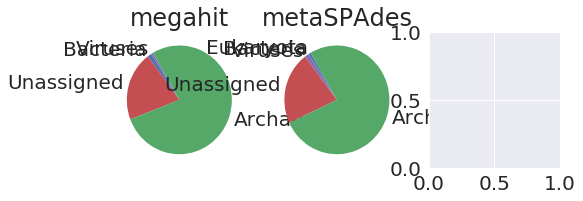

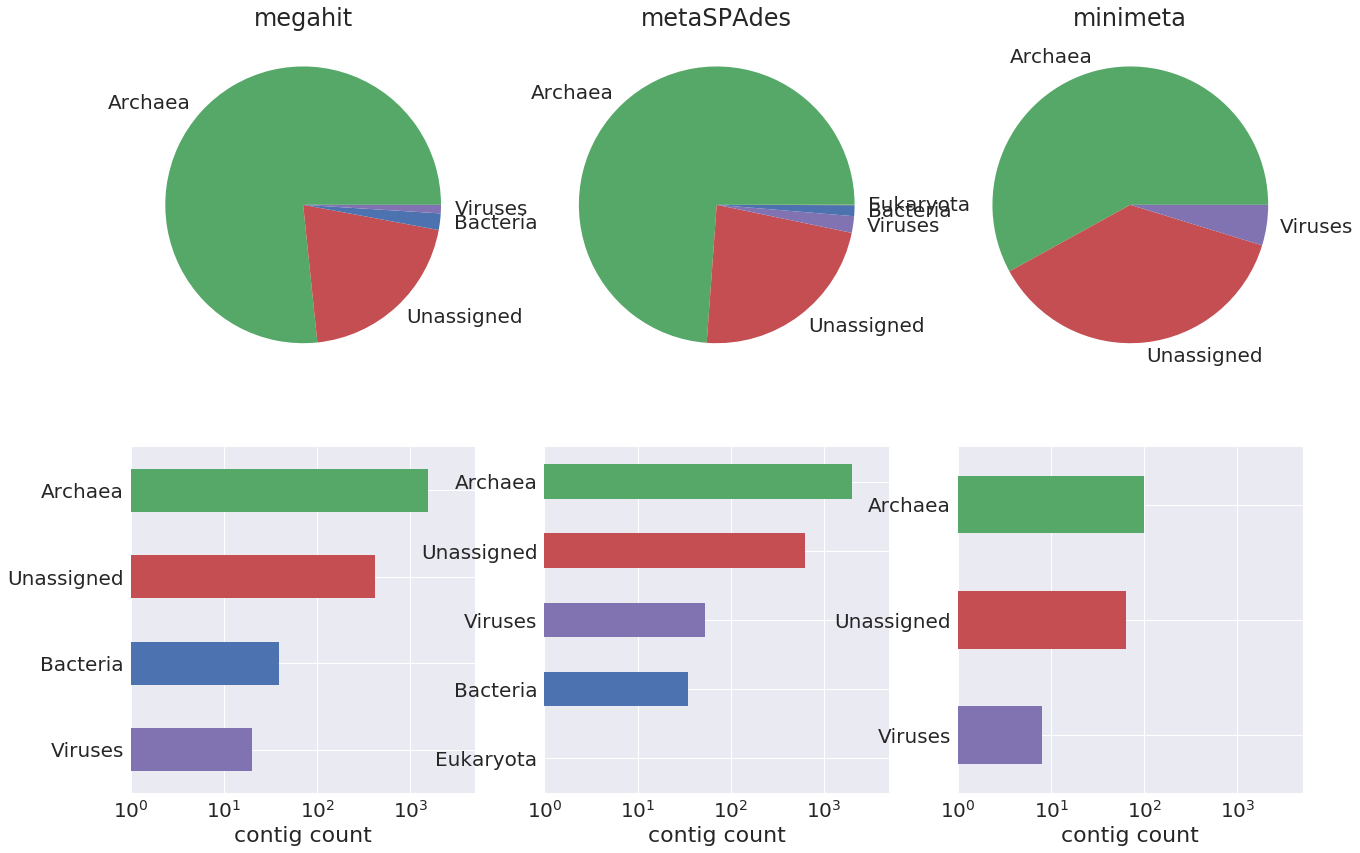

In [78]:
# the domain distribution for assembly types: does any method pick up on different things?
f,ax = plt.subplots()

plt.subplot(231)
barcolorspie = makeColorScheme(mh,'No')
mh['Lineage Domain'].value_counts().plot(kind='pie',legend=False,colors=barcolorspie)
plt.ylabel('')
plt.title('megahit')

plt.subplot(232)
barcolorspie = makeColorScheme(mS,'No')
mS['Lineage Domain'].value_counts().plot(kind='pie',legend=False,colors=barcolorspie)
plt.ylabel('')
plt.title('metaSPAdes')

plt.subplot(233)
barcolorspie = makeColorScheme(mm,'no')
mm['Lineage Domain'].value_counts().plot(kind='pie',figsize=(21,14),legend=False,colors=barcolorspie)
plt.ylabel('')
plt.title('minimeta')

plt.subplot(234)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mh,'YES')
mh['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',legend=False,logx=True,color=barcolorsdom)
plt.xlabel('contig count')
plt.xlim(1,5e3)

plt.subplot(235)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mS,'YES')
mS['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',logx=True,color=barcolorsdom)
#plt.yticks([])
plt.xlim(1,5e3)
plt.xlabel('contig count')

plt.subplot(236)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mm,'YES')
mm['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',figsize=(21,14),legend=False,logx=True,color=barcolorsdom)
#plt.yticks([])
plt.xlim(1,5e3)
plt.xlabel('contig count')
plt.show()


f.savefig(subfolder+expt_name+'_assemblyType.png')

In [80]:
barcolor

[array([ 0.76862745,  0.30588235,  0.32156863]),
 array([ 0.33333333,  0.65882353,  0.40784314]),
 array([ 0.29803922,  0.44705882,  0.69019608])]

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


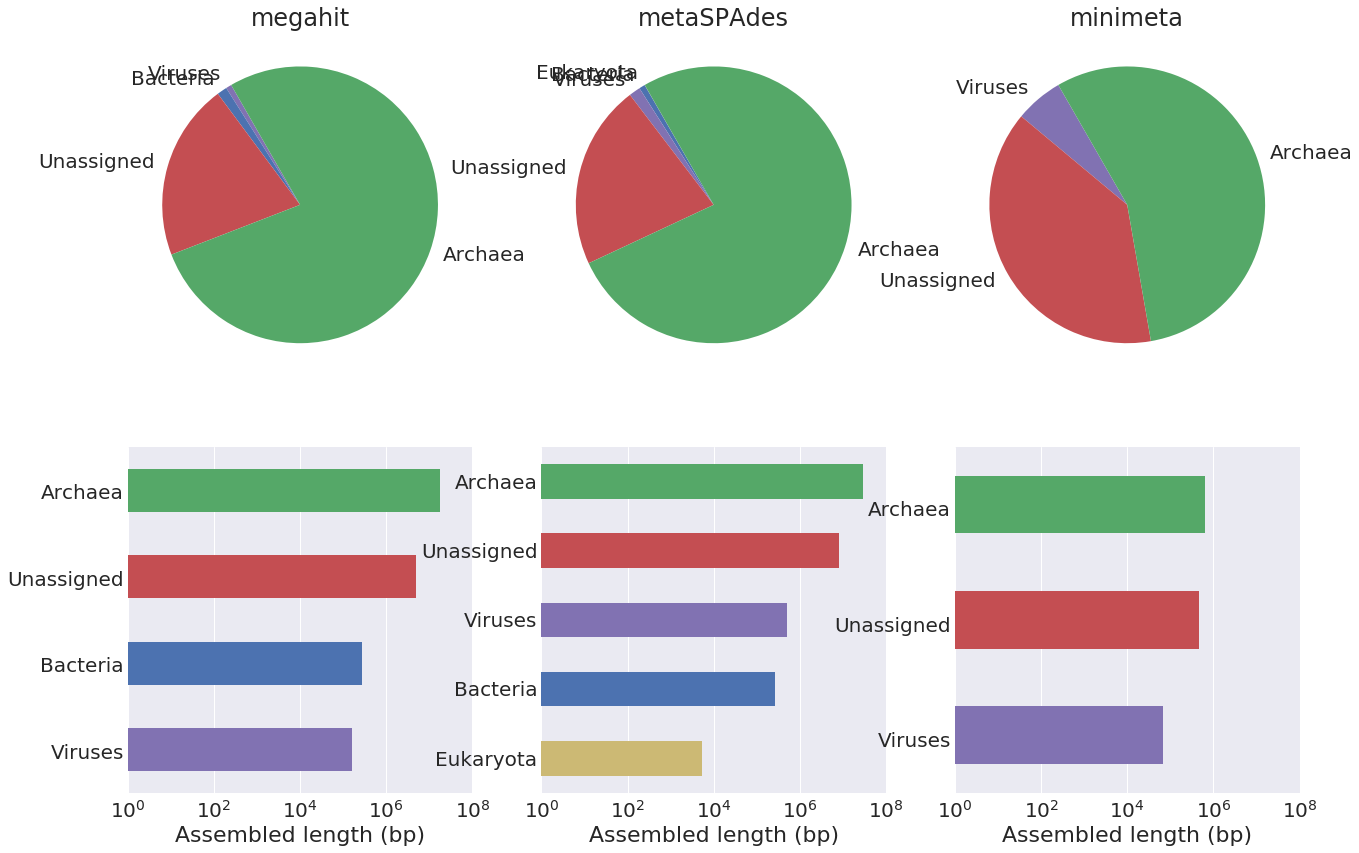

In [82]:
# the domain distribution for assembly types BY LENGTH: does any method pick up on different things?
f,ax = plt.subplots()

plt.subplot(231)
mhlengths,labels,barcolor = getLengthList(mh)
plt.pie(mhlengths,startangle=120,labels=labels,colors=barcolor)
plt.ylabel('')
plt.title('megahit')

plt.subplot(232)
mSlengths,labels,barcolor = getLengthList(mS)
plt.pie(mSlengths,startangle=120,labels=labels,colors=barcolor)
plt.ylabel('')
plt.title('metaSPAdes')

plt.subplot(233)
mmlengths,labels,barcolor = getLengthList(mm)
plt.pie(mmlengths,startangle=120,labels=labels,colors=barcolor)
plt.ylabel('')
plt.title('minimeta')

plt.subplot(234)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mh,'YES')
a= mh.groupby('Lineage Domain')['Sequence Length'].sum().reset_index()
a = a.sort_values('Sequence Length').reset_index()
ax = a.iloc[:,2].plot(kind='barh',legend=False,logx=True,color=barcolorsdom,figsize=(21,14))
for i, x in enumerate(a['Lineage Domain']):
    ax.text(0.81,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
plt.xlabel('Assembled length (bp)')
#b= [max(a['Sequence Length'])*2]
#plt.xlim(1,b[0])
plt.xlim(1,1e8)

plt.subplot(235)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mS,'YES')
a= mS.groupby('Lineage Domain')['Sequence Length'].sum().reset_index()
a = a.sort_values('Sequence Length').reset_index()
ax = a.iloc[:,2].plot(kind='barh',legend=False,logx=True,color=barcolorsdom,figsize=(21,14))
for i, x in enumerate(a['Lineage Domain']):
    ax.text(0.81,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
#b= [max(a['Sequence Length'])*2]
#plt.xlim(1,b[0])
plt.xlim(1,1e8)
plt.xlabel('Assembled length (bp)')

plt.subplot(236)
ax2 = f.add_subplot()

barcolorsdom = makeColorScheme(mm,'YES')
a= mm.groupby('Lineage Domain')['Sequence Length'].sum().reset_index()
a = a.sort_values('Sequence Length').reset_index()
ax = a.iloc[:,2].plot(kind='barh',legend=False,logx=True,color=barcolorsdom,figsize=(21,14))
for i, x in enumerate(a['Lineage Domain']):
    ax.text(0.81,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
#b= [max(a['Sequence Length'])*2]
#plt.xlim(1,b[0])
plt.xlim(1,1e8)
plt.xlabel('Assembled length (bp)')
plt.show()


f.savefig(subfolder+expt_name+'_assemblyType_length.png')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


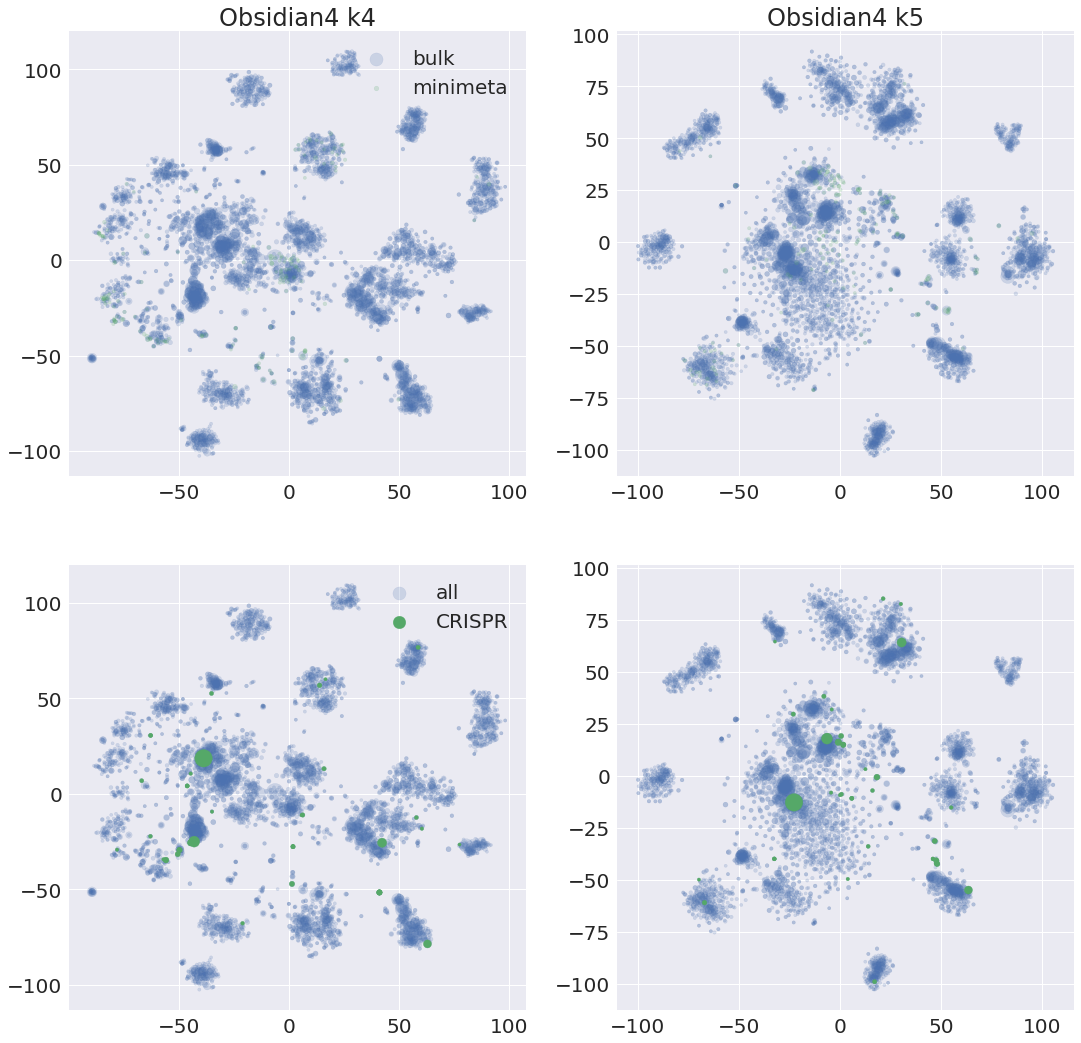

In [40]:
# tSNE all
crispr = df[df['CRISPR'].str.contains('YES')]
mini = selectMinimeta(df)
bulk = selectNotMinimeta(df)
f,ax = plt.subplots()
plt.subplot(221)
plt.scatter(bulk['k4_x'],bulk['k4_y'],s=bulk['Sequence Length']/5e2, alpha=0.2)
#plt.scatter(crispr['k4_x'],crispr['k4_y'],s=df['Sequence Length']/5e2)
plt.scatter(mini['k4_x'],mini['k4_y'],s=mini['Sequence Length']/5e2,alpha=0.2)
plt.title(expt_name+' k4')
plt.legend(['bulk','minimeta'])
legend= plt.legend(['bulk','minimeta'])
frame = legend.get_frame()
frame.set_facecolor('white')

plt.subplot(222)
plt.scatter(bulk['k5_x'],bulk['k5_y'],s=bulk['Sequence Length']/5e2, alpha=0.2)
#plt.scatter(crispr['k4_x'],crispr['k4_y'],s=df['Sequence Length']/5e2)
plt.scatter(mini['k5_x'],mini['k5_y'],s=mini['Sequence Length']/5e2,alpha=0.2)
plt.title(expt_name+' k5')

plt.subplot(223)
plt.scatter(df['k4_x'],df['k4_y'],s=df['Sequence Length']/5e2, alpha=0.2)
plt.scatter(crispr['k4_x'],crispr['k4_y'],s=crispr['Sequence Length']/5e2)
#plt.scatter(mini['k4_x'],mini['k4_y'],s=df['Sequence Length']/5e2,alpha=0.2)
plt.legend(['all','CRISPR'])

plt.subplot(224)
plt.scatter(df['k5_x'],df['k5_y'],s=df['Sequence Length']/5e2, alpha=0.2)
plt.scatter(crispr['k5_x'],crispr['k5_y'],s=crispr['Sequence Length']/5e2)
#plt.scatter(mini['k4_x'],mini['k4_y'],s=df['Sequence Length']/5e2,alpha=0.2)

f.set_figheight(18)
f.set_figwidth(18)
plt.show()

f.savefig(subfolder+expt_name+'_tSNEs.png')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


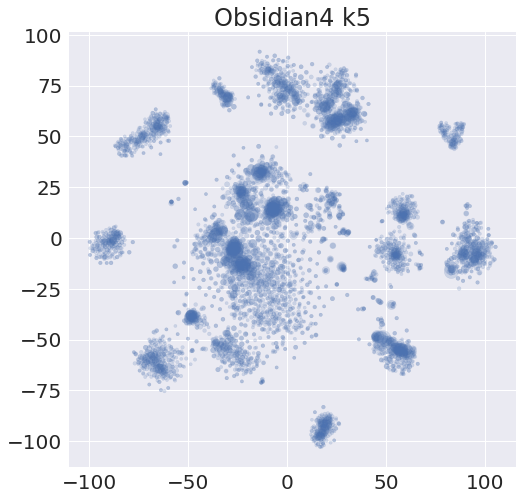

In [41]:
f,ax = plt.subplots()
plt.scatter(df['k5_x'],df['k5_y'],s=df['Sequence Length']/5e2, alpha=0.2)
#plt.scatter(mini['k5_x'],mini['k5_y'],s=df['Sequence Length']/5e2,alpha=0.2)
plt.title(expt_name+' k5')

f.set_figheight(8)
f.set_figwidth(8)
plt.show()
f.savefig(subfolder+expt_name+'_tSNEk5.png')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


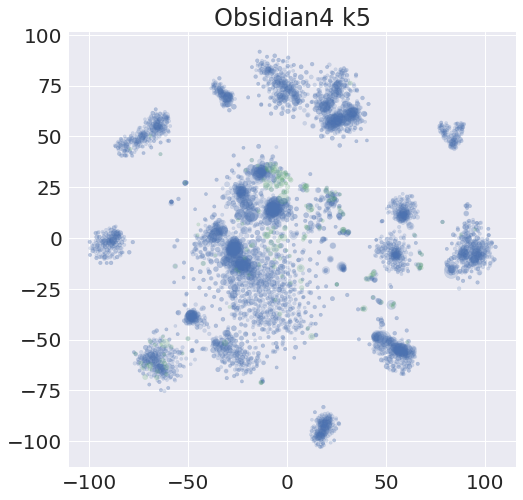

In [42]:
f,ax = plt.subplots()
plt.scatter(bulk['k5_x'],bulk['k5_y'],s=df['Sequence Length']/5e2, alpha=0.2)
plt.scatter(mini['k5_x'],mini['k5_y'],s=df['Sequence Length']/5e2,alpha=0.2)
plt.title(expt_name+' k5')

f.set_figheight(8)
f.set_figwidth(8)
plt.show()
f.savefig(subfolder+expt_name+'_tSNEk5_minimeta.png')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


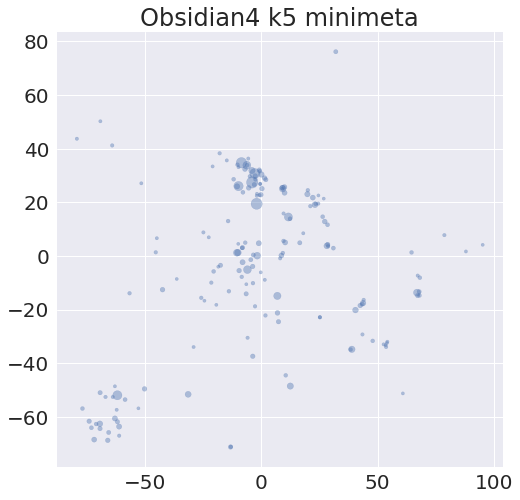

In [43]:
f,ax = plt.subplots()
plt.scatter(mini['k5_x'],mini['k5_y'],s=df['Sequence Length']/5e2,alpha=0.4)
plt.title(expt_name+' k5 minimeta')

f.set_figheight(8)
f.set_figwidth(8)
plt.show()
f.savefig(subfolder+expt_name+'_tSNEk5_minimetaOnly.png')

Crenarchaeota


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


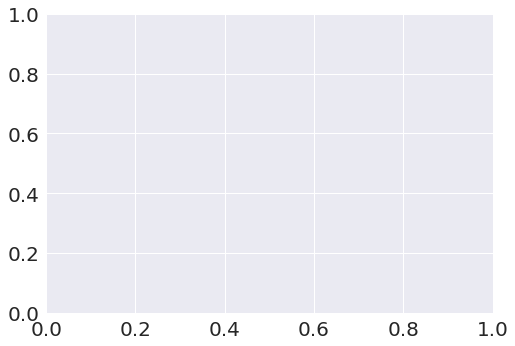

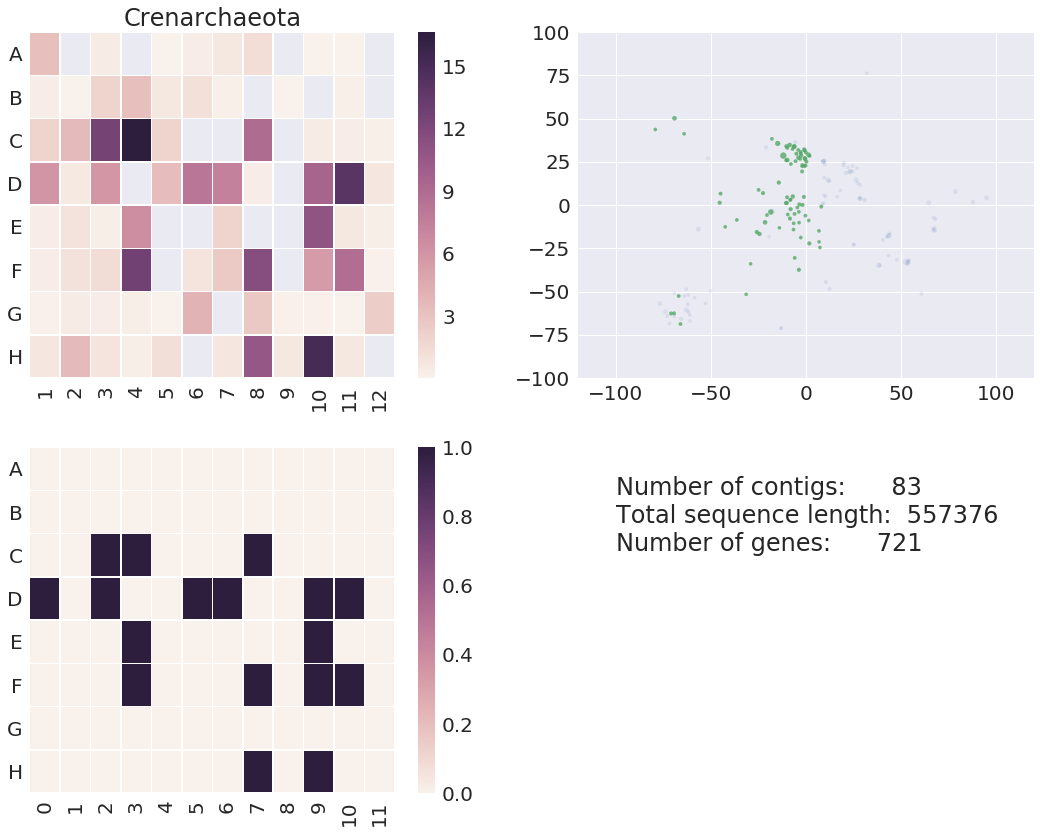

Unassigned


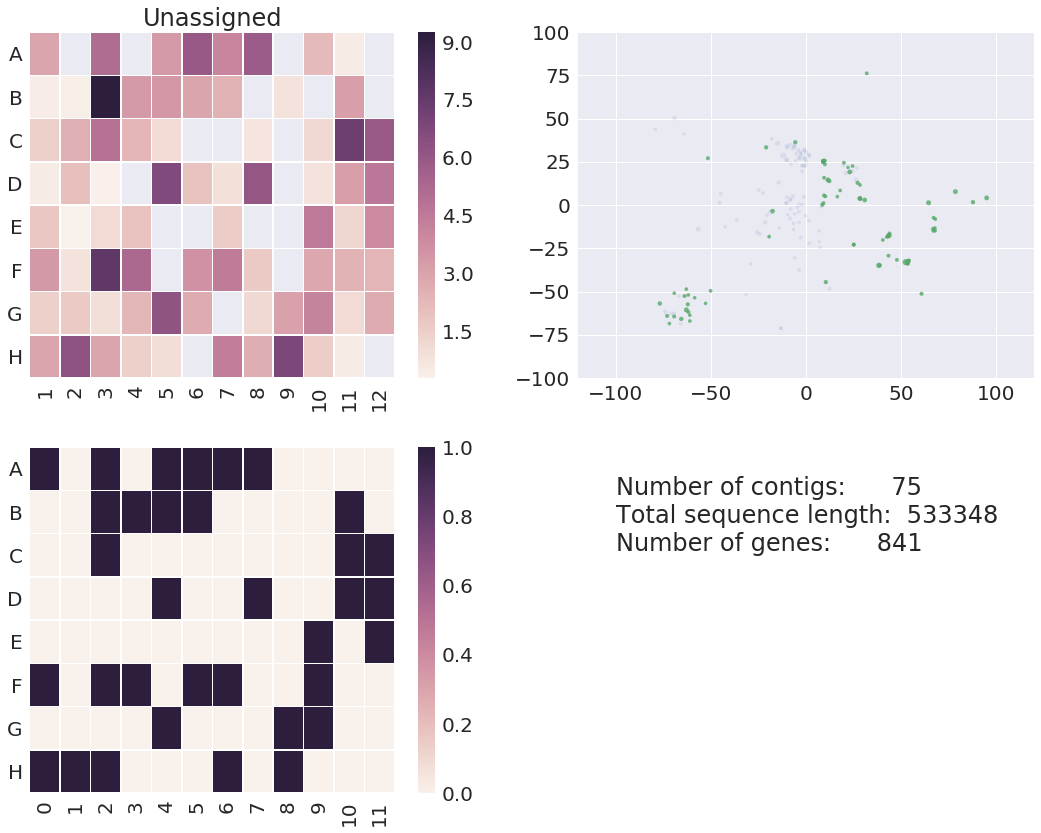

dsDNA viruses


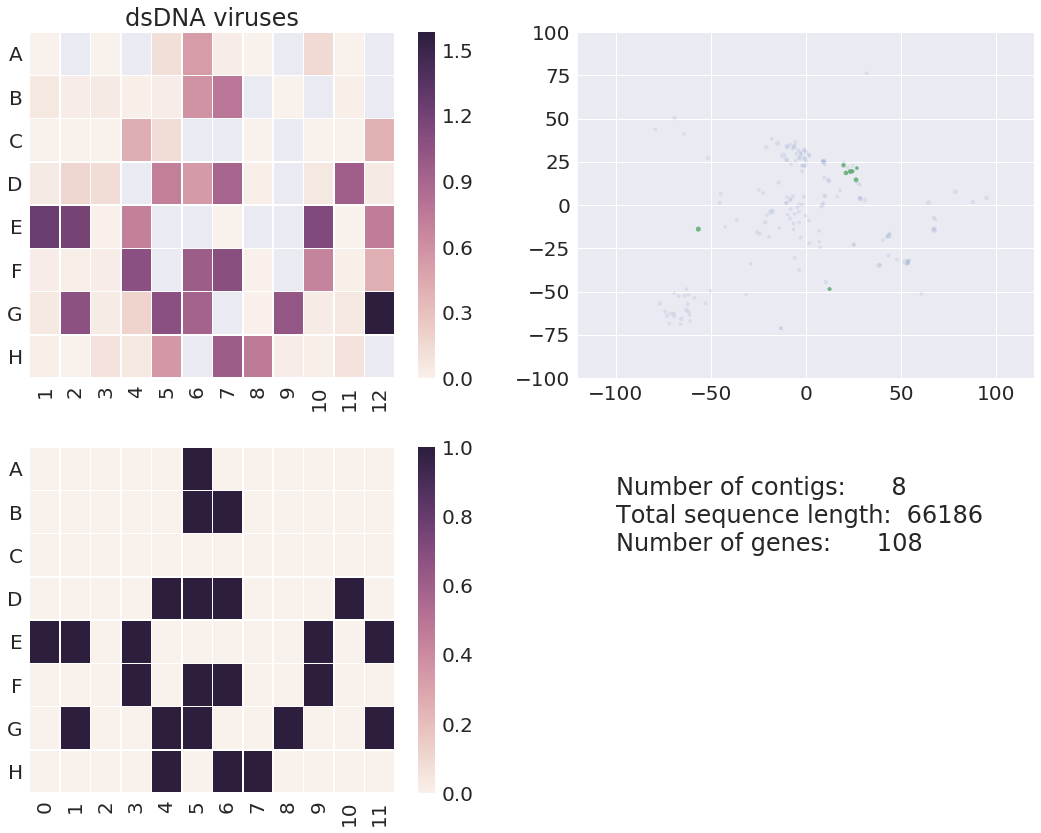

Euryarchaeota


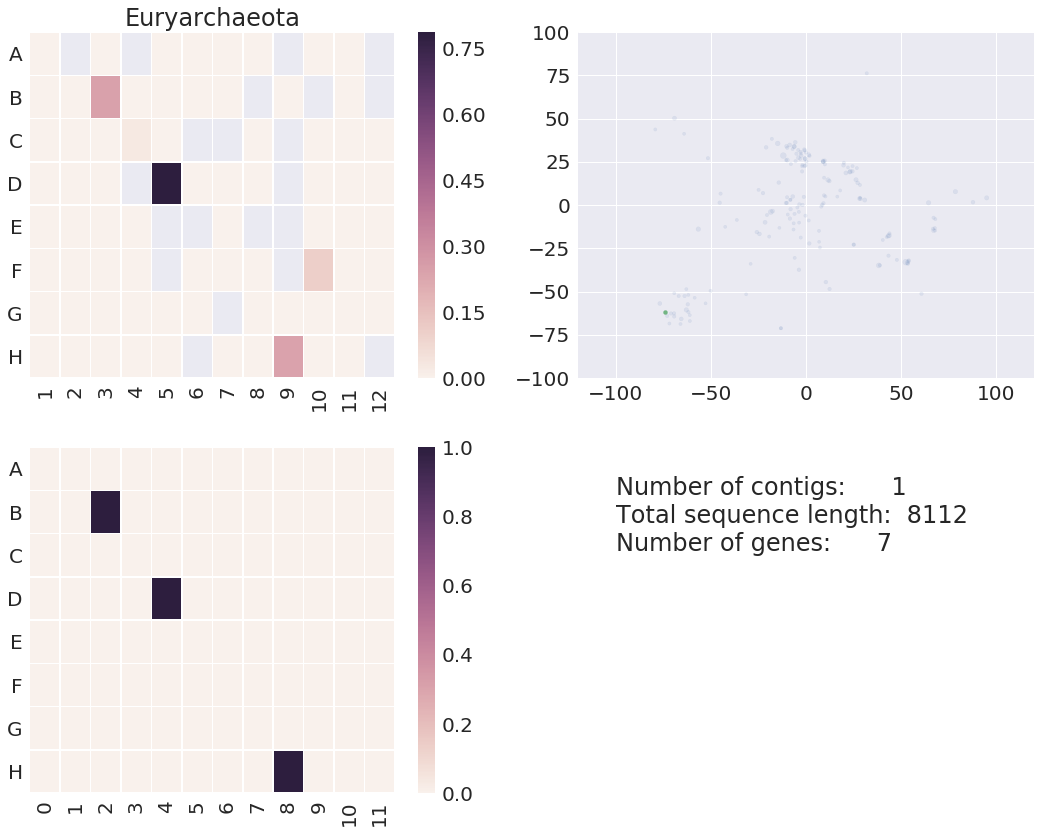

Nanoarchaeota


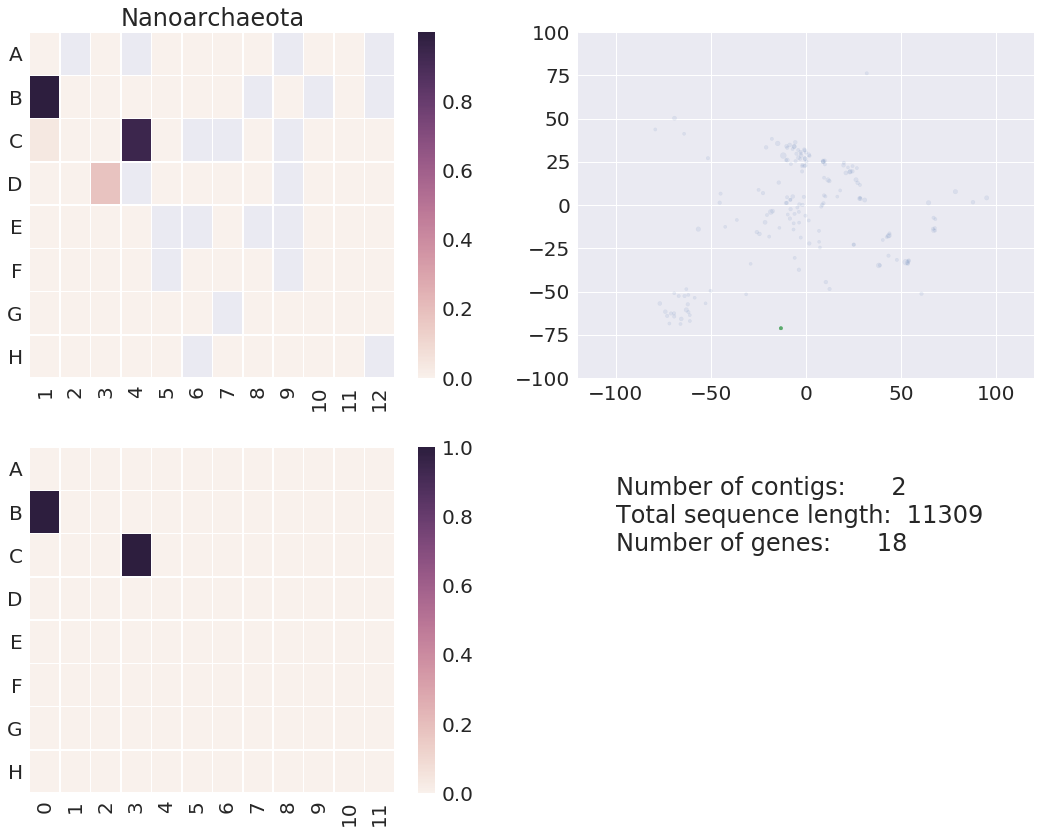

In [44]:
# plot all the phyla in minimeta contigs
phylum_abundance = plotallphyla(df,'Lineage Phylum','include')

In [45]:
phylum_abundance

,Phylum,counts,chip,fractional occup.,mean_occup.,number of cells,num_contigs,length,genes
0,Crenarchaeota,583,17,0.226667,0.257045,21.369767,83,557376,721
1,Unassigned,463,34,0.453333,0.603916,54.533146,75,533348,841
2,dsDNA viruses,52,24,0.320000,0.385662,33.255900,8,66186,108
3,Euryarchaeota,4,3,0.040000,0.040822,3.122466,1,8112,7
4,Nanoarchaeota,3,2,0.026667,0.027029,2.054057,2,11309,18


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


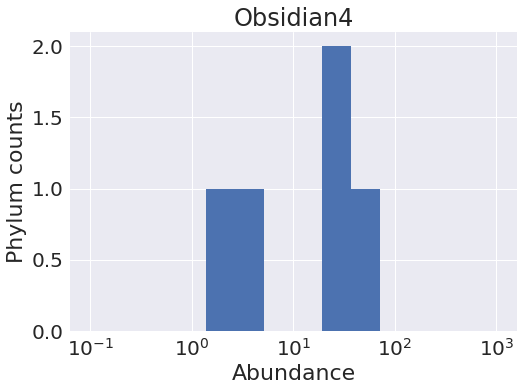

In [46]:
f = plt.figure()
plt.hist(phylum_abundance['number of cells'], bins=np.logspace(-1,3,15))#*len(df.iloc[0,23
plt.xscale('log')
plt.ylabel('Phylum counts')
plt.xlabel('Abundance')
plt.title(expt_name)
plt.show()
f.savefig(subfolder+expt_name+'_phylumAD.png')

In [258]:
"""a = df[df['Lineage Species'].str.contains('populeti')]   #'[Clostridium] populeti')] #this was giving an error message
a["Lineage Species"]"""

a = df.loc[df['Lineage Species'].str.contains('populeti')]
a.index[0]
#df.iloc[a.index[0],14] = 'Clostridium populeti'
df.iloc[a.index[0],14]

'Clostridium populeti'

Unassigned


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


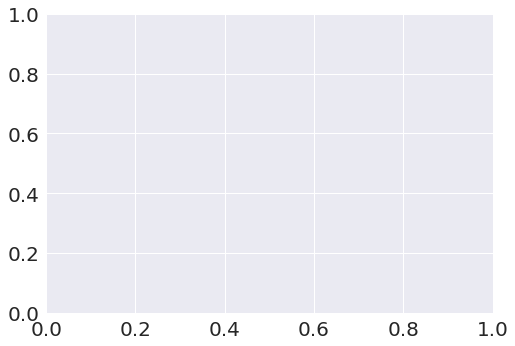

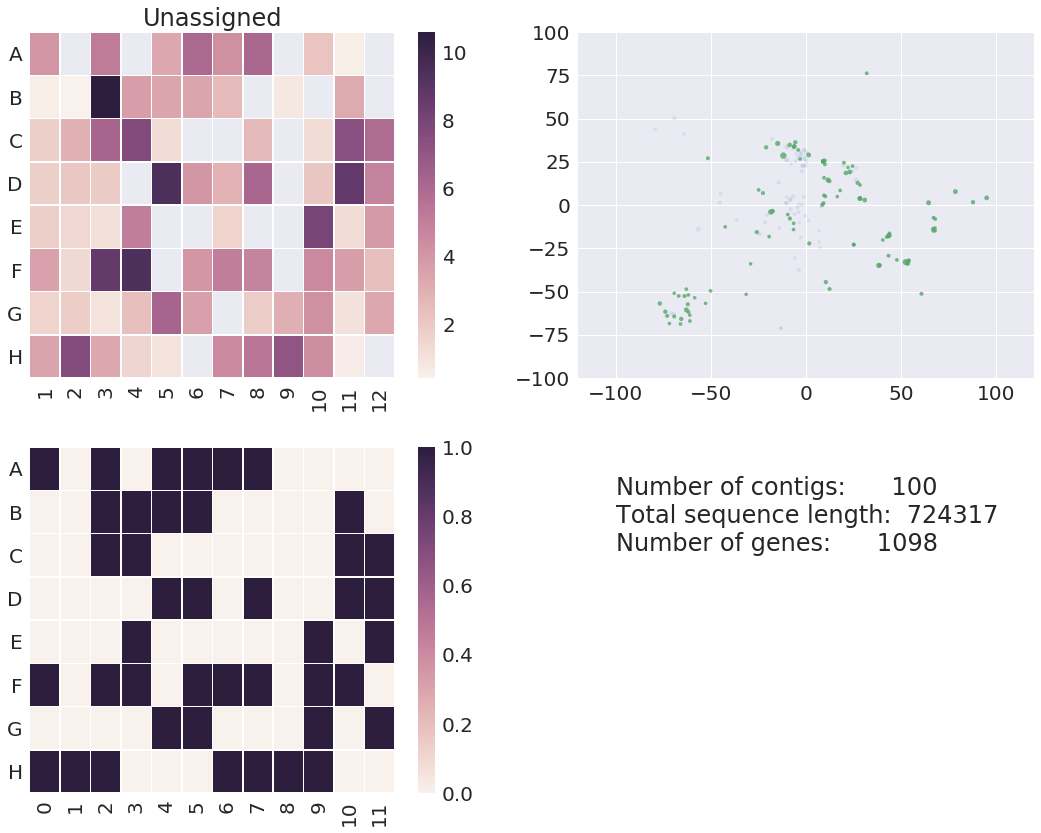

Rudivirus


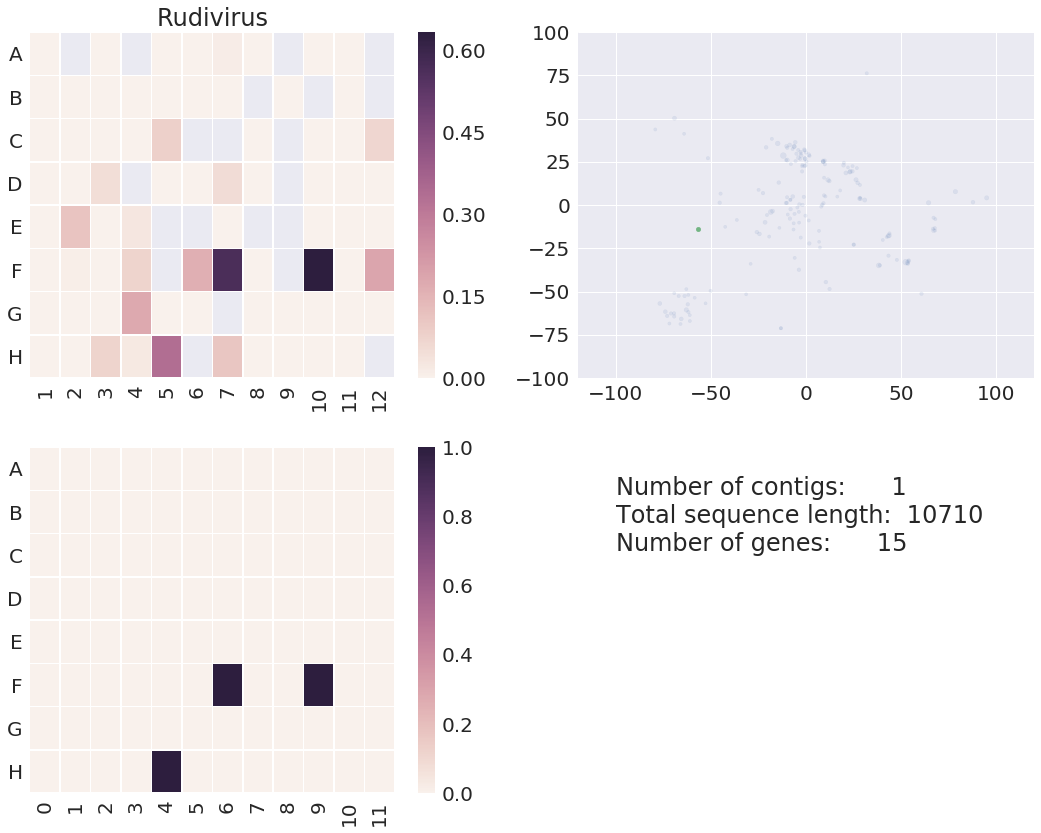

Betalipothrixvirus


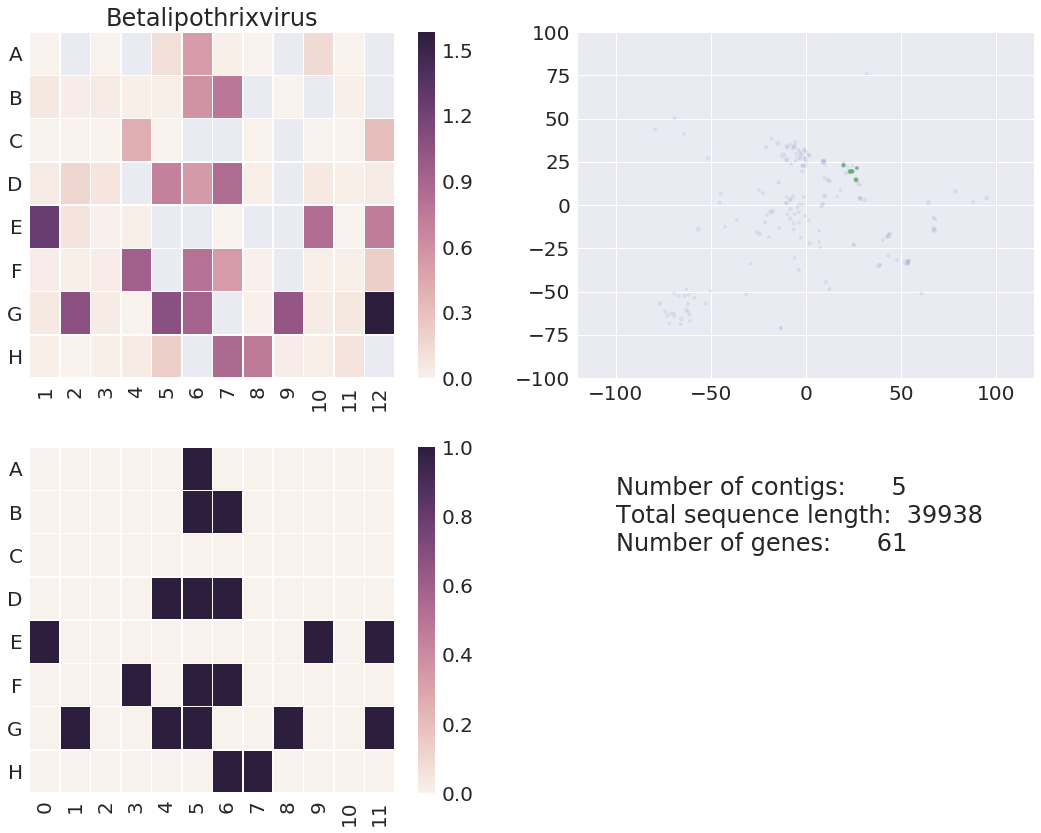

Sulfolobus tokodaii


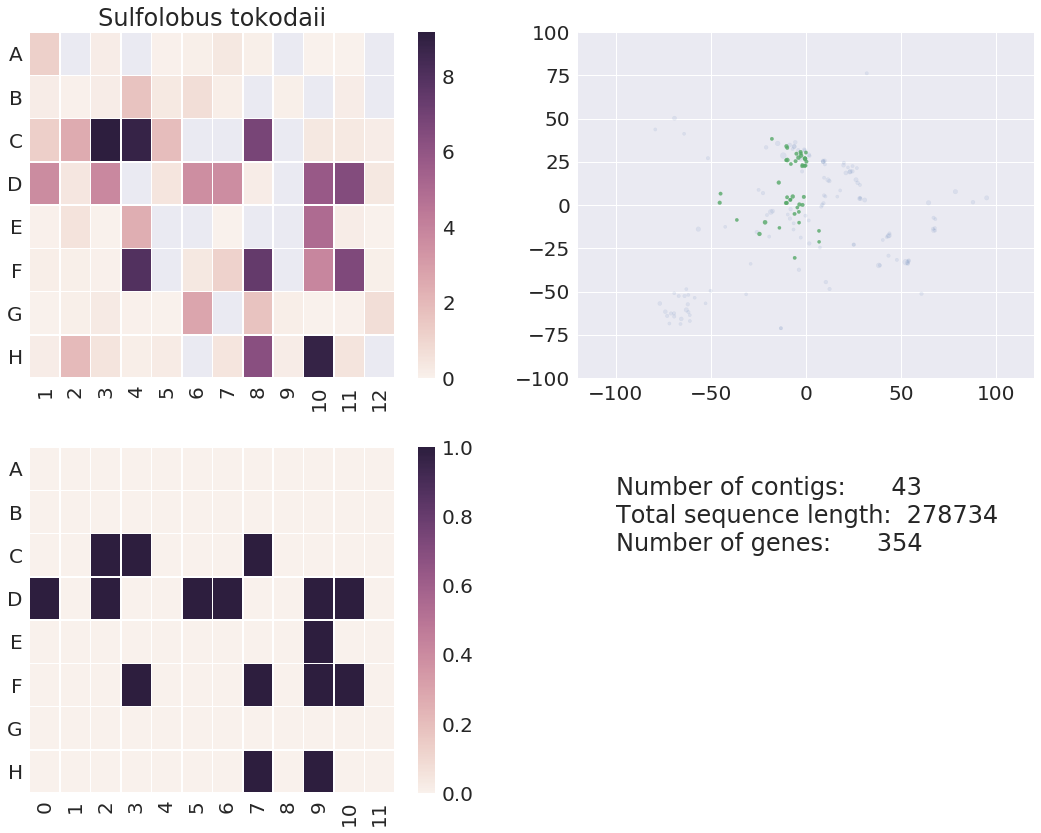

unclassified


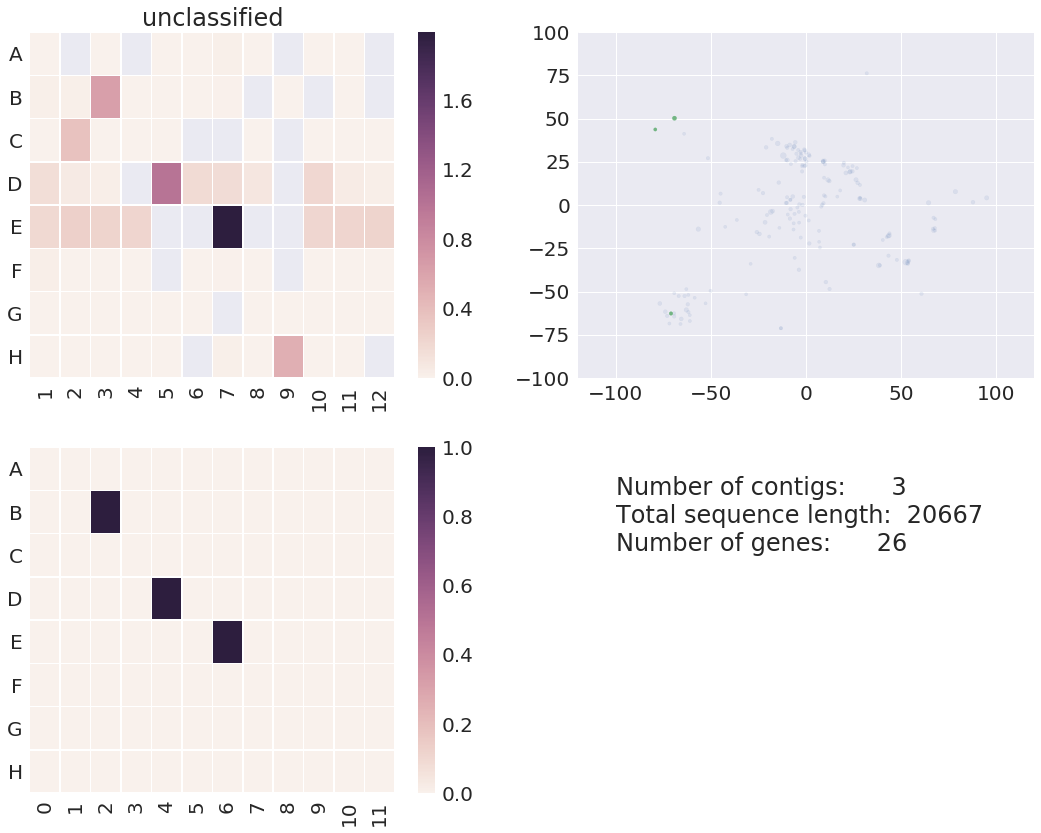

Sulfolobus islandicus


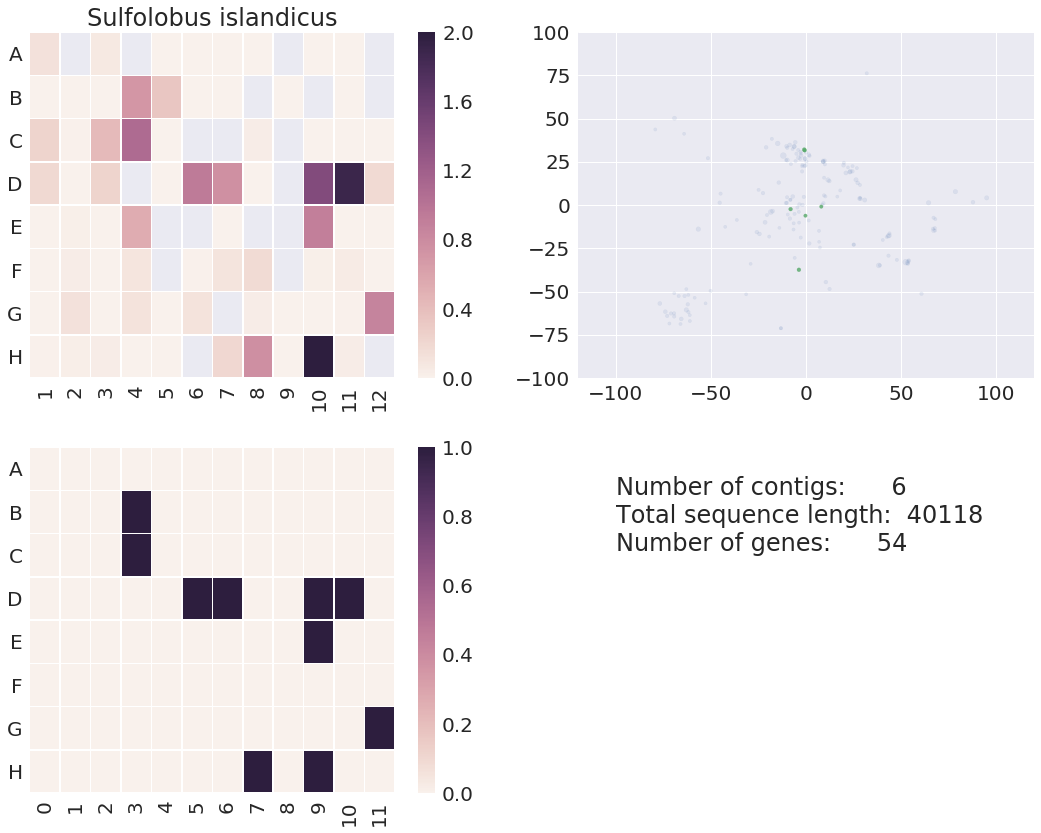

Caldisphaera lagunensis


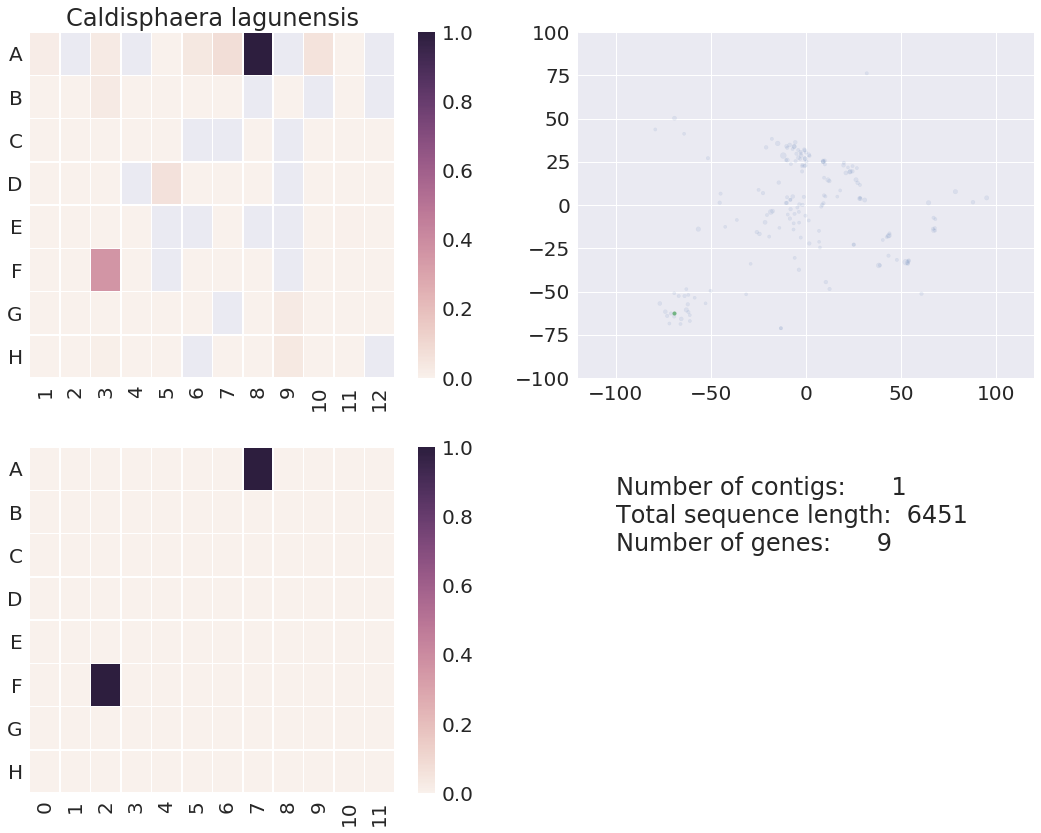

Acidianus hospitalis


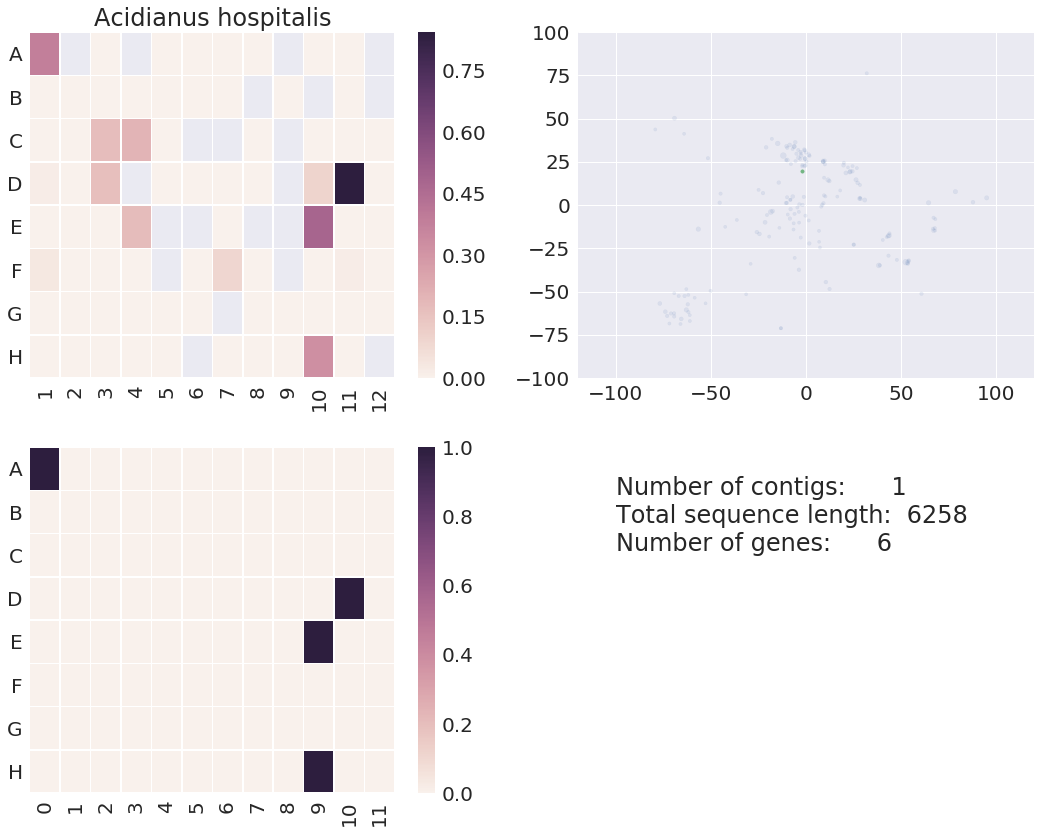

Candidatus Nanopusillus acidilobi


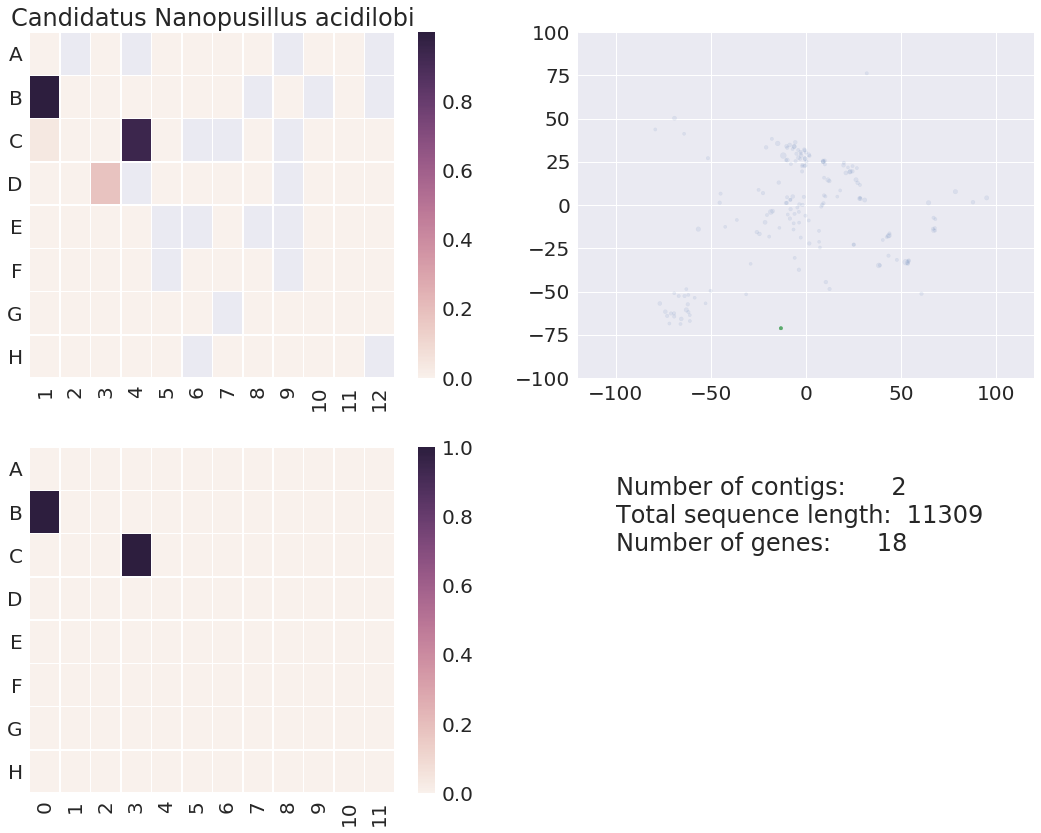

Sulfolobales archaeon Acd1


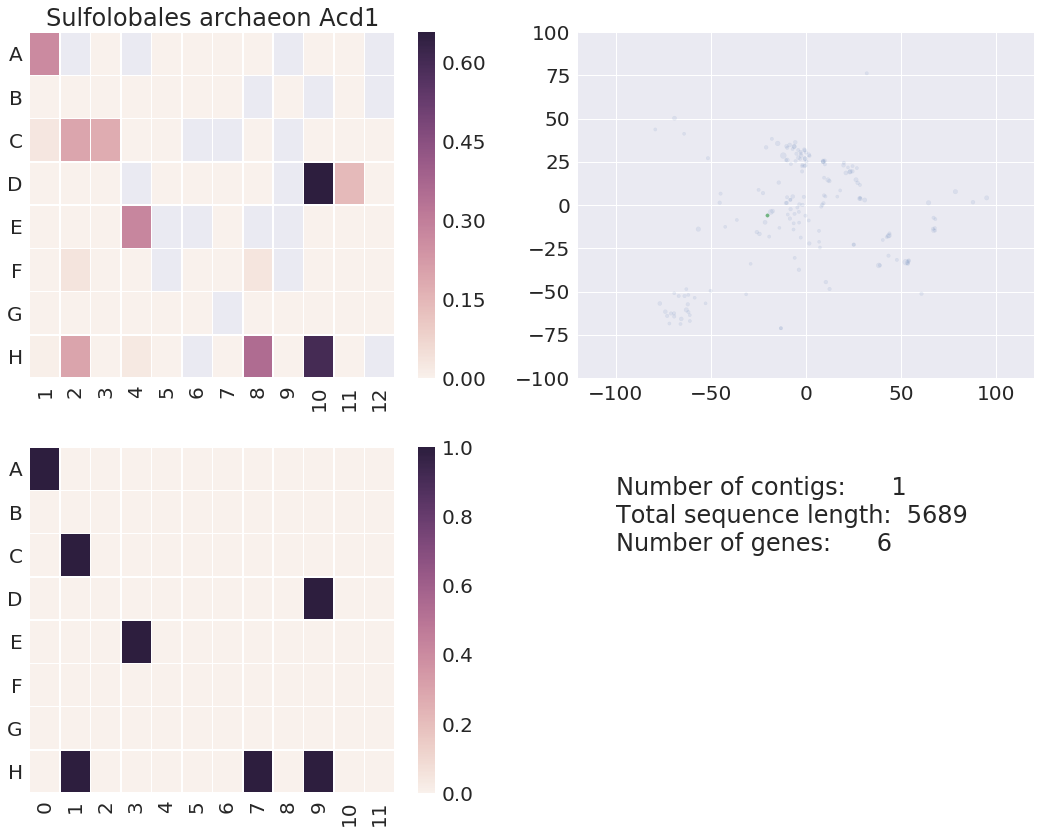

Sulfolobus acidocaldarius


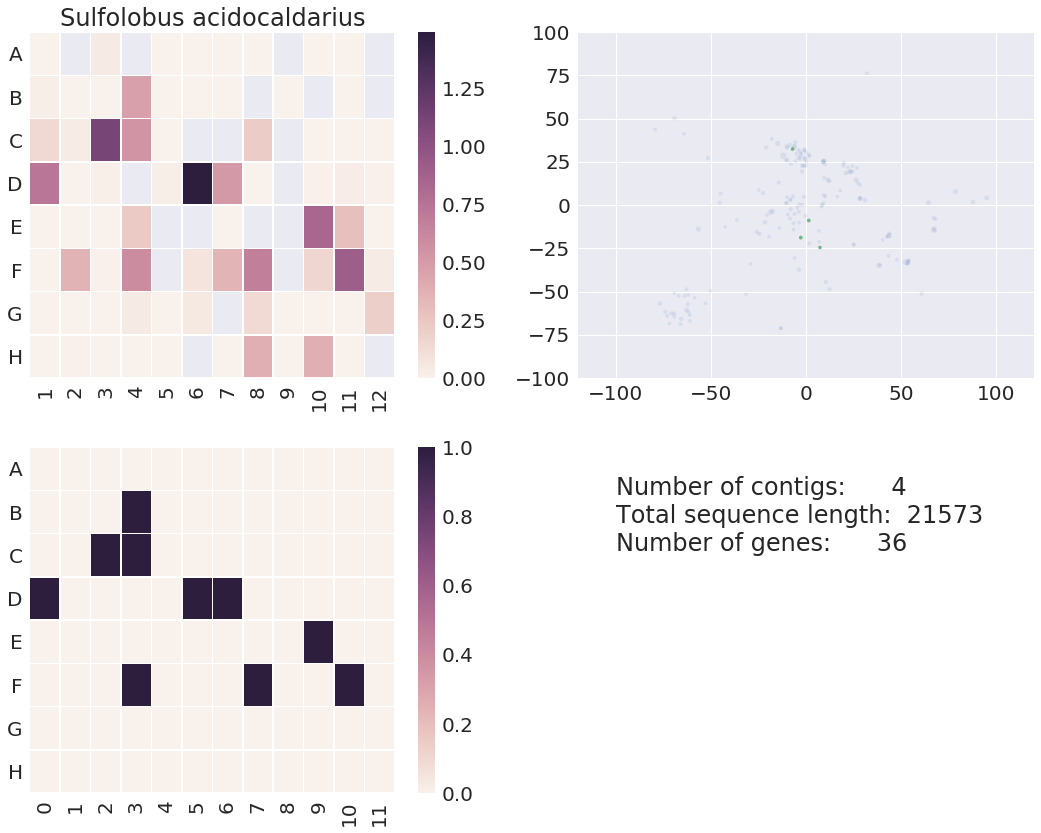

Acidilobus sulfurireducens


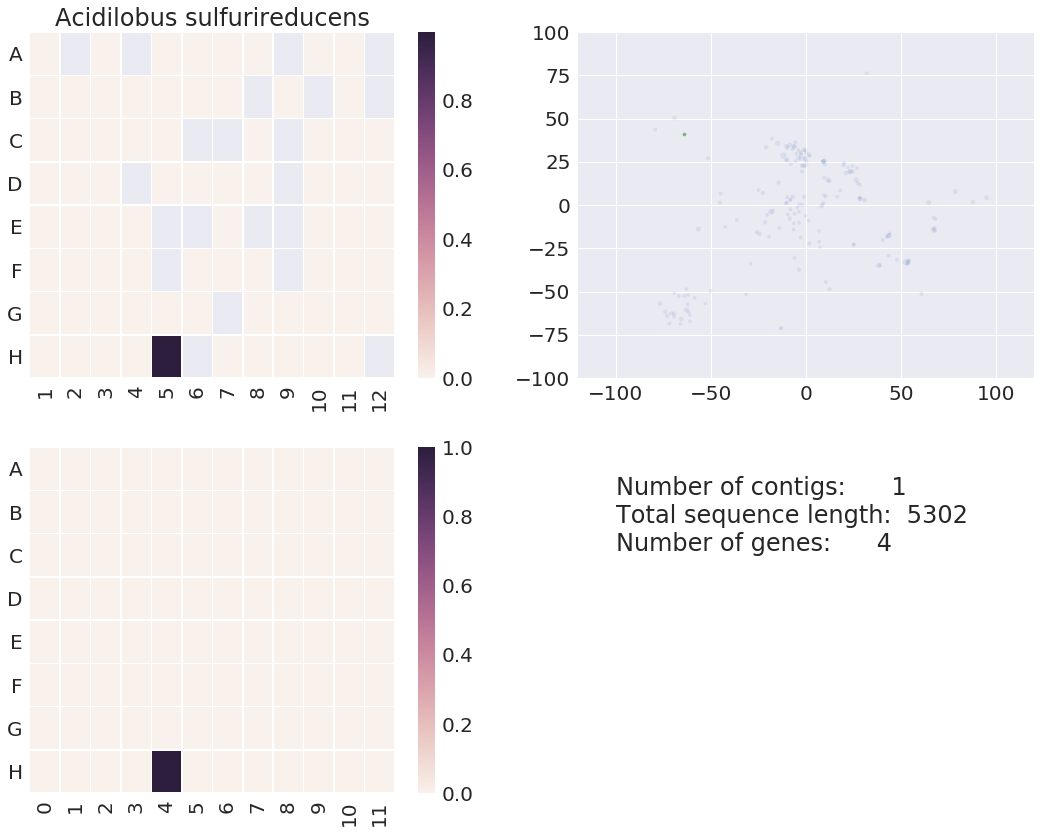

Metallosphaera sedula


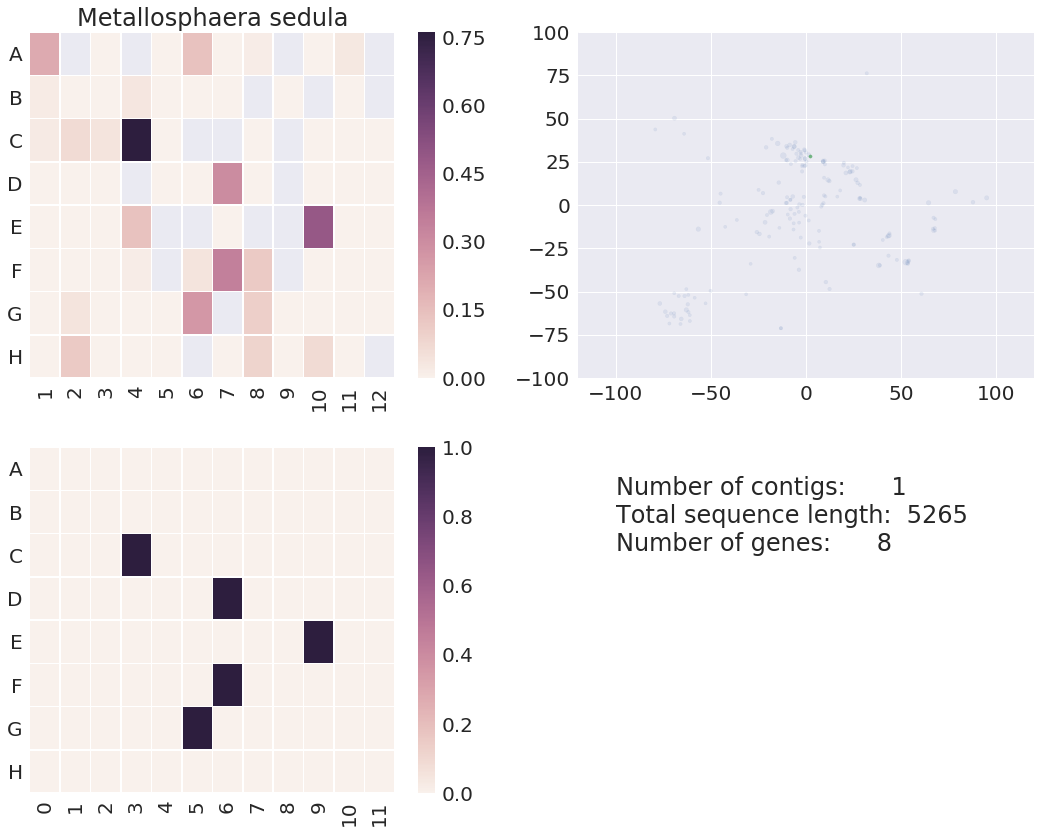

In [47]:
# plot all the species in minimeta contigs 
species_abundance = plotallphyla(df,'Lineage Species','include')

In [48]:
species_abundance


,Species,counts,chip,fractional occup.,mean_occup.,number of cells,num_contigs,length,genes
0,Unassigned,617,42,0.560000,0.820981,76.481183,100,724317,1098
1,Rudivirus,8,3,0.040000,0.040822,3.122466,1,10710,15
2,Betalipothrixvirus,40,19,0.253333,0.292136,24.550592,5,39938,61
3,Sulfolobus tokodaii,324,16,0.213333,0.239951,19.839211,43,278734,354
4,unclassified,16,3,0.040000,0.040822,3.122466,3,20667,26
5,Sulfolobus islandicus,32,10,0.133333,0.143101,11.431008,6,40118,54
6,Caldisphaera lagunensis,2,2,0.026667,0.027029,2.054057,1,6451,9
7,Acidianus hospitalis,8,4,0.053333,0.054808,4.219233,1,6258,6
8,Candidatus Nanopusillus acidilobi,3,2,0.026667,0.027029,2.054057,2,11309,18
9,Sulfolobales archaeon Acd1,9,7,0.093333,0.097980,7.685863,1,5689,6


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


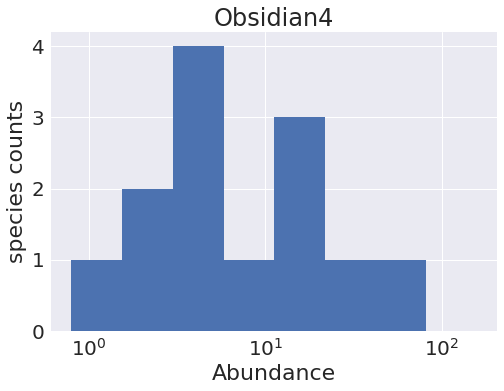

In [52]:
f= plt.figure()
plt.hist(species_abundance['number of cells'], bins=np.logspace(-0.1,2.2,9))#*len(df.iloc[0,23
plt.xscale('log')
plt.ylabel('species counts')
plt.xlabel('Abundance')
plt.title(expt_name)
plt.show()
f.savefig(subfolder+expt_name+'_speciesAD.png')

In [279]:
# now we put them together to make a movie! let's set up the movie writer
framerate = 24 # 24 frames per second
FFMpegWriter = manimation.writers['avconv']
metadata = dict(title='Species_'+expt_name+'_minimeta', artist='Bojk', comment='')
writer = FFMpegWriter(fps=framerate, metadata=metadata)

# we generate some synthetic data.
#we will make a list of X, Y lists.
frames = []
frameNumber = 240 # we generate 240 different frames
 
for i in range(0,frameNumber):
    xData = np.linspace(0,2*np.pi)
    yData = np.sin(xData - i * 2.0*np.pi / frameNumber )
    frames.append( [xData, yData] )

# let's write to the file!
with writer.saving(fig, "anim.mp4", 100):
    for i in range(frameNumber):
        x, y = frames[i]
        l.set_data( x, y)

writer.grab_frame()

KeyError: 'avconv'

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


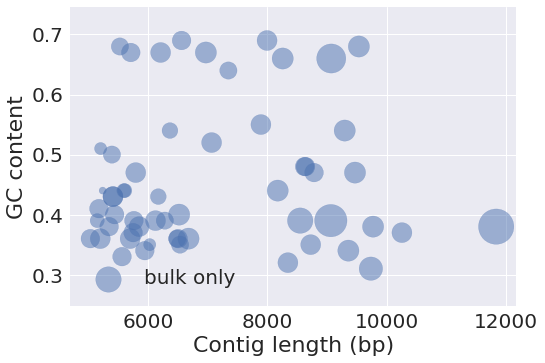

In [92]:
# phyla not in minimeta but in bulk
allphyla = df['Lineage Phylum'].unique()
bulk = selectNotMinimeta(df)
allphyla_bulk = bulk['Lineage Phylum'].unique()
mini = selectMinimeta(df)
allphyla_mini = mini['Lineage Phylum'].unique()

not_in_mini = np.setdiff1d(allphyla,allphyla_mini)
not_in_bulk = np.setdiff1d(allphyla,allphyla_bulk)

if len(not_in_mini)>0:
    df_not_mini = df[df['Lineage Phylum'].str.contains(not_in_mini[0])]
    for i in range(1,len(not_in_mini)):
        a = df[df['Lineage Phylum'].str.contains(not_in_mini[i])]
        df_not_mini = df_not_mini.append(a)

if len(not_in_bulk)>0:        
    df_not_bulk = df[df['Lineage Phylum'].str.contains(not_in_bulk[0])]
    for i in range(1,len(not_in_bulk)):
        a = df[df['Lineage Phylum'].str.contains(not_in_bulk[i])]
        df_not_bulk = df_not_bulk.append(a)    

def getrankedsummedlength(data,title):
    domlist = ['Bacteria','Archaea','Unassigned','Viruses','Eukaryota']
    a = data['Lineage Phylum']
    letter_counts = Counter(a)
    phyl = pd.DataFrame.from_dict(letter_counts, orient='index')
    #phyl = phyl.sort_values(by=0,ascending=1)
    phyl['dom']= '';k=0
    for i in list(phyl.index):
        #idx = data.loc[data['Lineage Phylum'] == i]
        #phyl.iloc[k,1] = data.iloc[idx.index[0],8]
        phyl.iloc[k,0] = data.loc[data['Lineage Phylum'] == i, 'Sequence Length'].sum()
        k+=1
    phyl = phyl.sort_values(by=0,ascending=1)
    
    barcolors = []
    for i in range(0, len(phyl)):
        for j in range(0,len(domlist)):
            if phyl.iloc[i,1] == domlist[j]:
                barcolors.append(barcolortype[j])

    phyl.plot(kind='barh',legend=False)#,logx=True,color=[barcolors],ax=ax3)
    plt.xlabel('Assembled length (bp)')
    plt.title(title)
    plt.show()
    return(phyl)

if len(not_in_mini)>0: 
    plt.scatter(df_not_mini['Sequence Length'],df_not_mini['GC Content'],alpha=0.5,s=df_not_mini['Gene Count']*50)
    
if len(not_in_bulk)>0: 
    plt.scatter(df_not_bulk['Sequence Length'],df_not_bulk['GC Content'],alpha=0.3,s=df_not_bulk['Gene Count']*50)
    
#plt.xscale('log')
#plt.xlim(3e3,1e4)
if (len(not_in_mini)>0) and (len(not_in_bulk)>0):
    plt.legend(['bulk only','minimeta only'])
elif len(not_in_bulk)==0:
    plt.legend(['bulk only'])
elif len(not_in_mini)==0:
    plt.legend(['minimeta only'])
plt.ylabel('GC content')
plt.xlabel('Contig length (bp)')
plt.show()

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


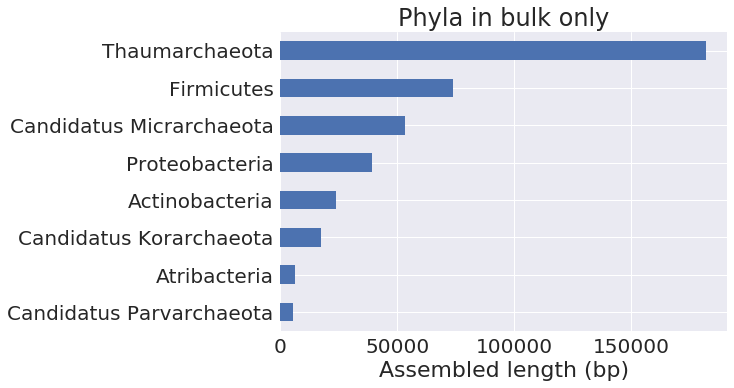

In [89]:
a=getrankedsummedlength(df_not_mini,'Phyla in bulk only')

In [86]:
not_in_bulk

array([], dtype=object)